In [1]:
from collections import defaultdict

import matplotlib.pyplot as pyplot
import numpy as np
import pandas as pd
from scipy.stats import pearsonr

from scipy.cluster import hierarchy

from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


Bad key "text.kerning_factor" on line 4 in
/scratch/ss2686/envs/my-rdkit-env/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
from scipy.io import arff
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import matthews_corrcoef
from scipy.io import arff
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

In [3]:
cp = pd.read_csv("../../CenterMeanOVLP.csv") 
cp


,Unnamed: 0,Cells_AreaShape_Area,Cells_AreaShape_Center_X,Cells_AreaShape_Center_Y,Cells_AreaShape_Compactness,Cells_AreaShape_Eccentricity,Cells_AreaShape_EulerNumber,Cells_AreaShape_Extent,Cells_AreaShape_FormFactor,Cells_AreaShape_MajorAxisLength,...,Nuclei_Texture_Variance_ER_10_0,Nuclei_Texture_Variance_ER_3_0,Nuclei_Texture_Variance_ER_5_0,Nuclei_Texture_Variance_Mito_10_0,Nuclei_Texture_Variance_Mito_3_0,Nuclei_Texture_Variance_Mito_5_0,Nuclei_Texture_Variance_RNA_10_0,Nuclei_Texture_Variance_RNA_3_0,Nuclei_Texture_Variance_RNA_5_0,smiles_r
0,0,-53.322266,15.138672,-7.832031,0.020546,0.011831,0.0,-0.005042,0.006361,1.567715,...,0.007785,0.019312,0.020843,-0.064662,-0.072990,-0.084042,0.215716,0.155296,0.176099,Brc1c(NC2=NCCN2)ccc2nccnc12
1,1,41.678711,1.973633,-8.867188,0.008705,0.008857,0.0,-0.001514,-0.009787,0.946463,...,-0.018887,-0.003844,-0.019000,0.007360,0.025757,0.027188,0.088701,0.052283,0.062916,c1ccc(C(O[C@@H]2CCCN(CCc3ccc4c(c3)OCO4)C2)c2cc...
2,2,418.492188,6.976562,7.766602,0.023997,0.005404,0.0,-0.005869,-0.024194,6.252890,...,-0.105881,0.011543,0.004370,-0.208441,-0.081369,-0.084740,-0.095445,-0.015152,-0.045636,c1cnc(N2CCN(Cc3ccc4c(c3)OCO4)CC2)nc1
3,3,-10.445312,0.101562,-0.045898,-0.003597,0.000294,0.0,0.002599,-0.001359,-0.473211,...,-0.024427,-0.053814,-0.040165,-0.066490,-0.036203,-0.040287,0.040549,0.026975,0.027425,c1ccc(C2CC2)c(OCC2=NCCN2)c1
4,4,48.655273,1.666992,2.486328,0.018529,0.011256,0.0,-0.002420,0.004862,1.776159,...,0.116695,0.172022,0.164453,-0.012553,0.000800,-0.010659,0.088510,0.083851,0.076598,C(=C/c1ccccc1)\CN1CCN(C(c2ccccc2)c2ccccc2)CC1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
641,641,-133.445312,-2.585938,-4.170898,-0.006187,-0.002578,0.0,-0.001801,-0.007760,-2.365016,...,-0.069310,-0.098329,-0.084651,-0.048275,-0.071216,-0.062632,-0.079043,-0.088448,-0.085335,c1ccc2c(c1)[nH]c1cnccc12
642,642,-26.469727,-0.145508,-0.763672,-0.006640,-0.000166,0.0,0.001977,-0.003229,-0.770855,...,-0.040332,-0.035610,-0.022689,-0.003744,-0.012261,-0.003150,-0.006708,-0.009239,-0.004748,c1ccc2c(c1)cc1ccc3cccc4ccc2c1c34
643,643,215.939732,2.107143,-7.992188,0.014079,0.009538,0.0,-0.005964,0.005382,3.785917,...,-0.084987,-0.049924,-0.072038,-0.012332,0.017893,0.006418,0.005525,0.026849,0.029421,c1ccc(-c2ccc(C(c3ccccc3)n3ccnc3)cc2)cc1
644,644,1810.023438,4.320312,-1.496094,0.085425,0.025699,0.0,-0.030275,-0.063700,27.234844,...,0.243208,0.345452,0.292939,0.108634,0.165323,0.152386,-0.089590,-0.020275,-0.033736,c1cnc2c(c1)ccc1cccnc12


In [4]:
toxcast = pd.read_csv("../../toxcast_Overlap.csv") 
toxcast

,Unnamed: 0,ACEA_T47D_80hr_Negative,ACEA_T47D_80hr_Positive,APR_HepG2_CellCycleArrest_24h_dn,APR_HepG2_CellCycleArrest_24h_up,APR_HepG2_CellCycleArrest_72h_dn,APR_HepG2_CellLoss_24h_dn,APR_HepG2_CellLoss_72h_dn,APR_HepG2_MicrotubuleCSK_24h_dn,APR_HepG2_MicrotubuleCSK_24h_up,...,Tanguay_ZF_120hpf_PE_up,Tanguay_ZF_120hpf_PFIN_up,Tanguay_ZF_120hpf_PIG_up,Tanguay_ZF_120hpf_SNOU_up,Tanguay_ZF_120hpf_SOMI_up,Tanguay_ZF_120hpf_SWIM_up,Tanguay_ZF_120hpf_TRUN_up,Tanguay_ZF_120hpf_TR_up,Tanguay_ZF_120hpf_YSE_up,smiles_r
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NCc1ccccc1
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C=CCN1CCc2nc(N)sc2CC1
2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,COc1cc(-c2ccc(=O)[nH]n2)ccc1OC(F)F
3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CC1(C)CCC(C)(C)c2cc(C(=O)Nc3ccc(C(=O)O)cc3)ccc21
4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,COc1ccc(Cl)cc1C(=O)NCCc1ccc(S(=O)(=O)NC(=O)NC2...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
641,641,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CC(C)(C)NC(=O)[C@H]1CC[C@H]2[C@@H]3CC[C@H]4NC(...
642,642,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,O=C(O)c1ccc2[nH]cc(CCCCN3CC=C(c4ccccc4)CC3)c2c1
643,643,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Clc1cccc(SC2CCNCC2)n1
644,644,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CCN(CC)CCOc1ccc(Cc2ccccc2)cc1


In [38]:
tox_list=[   'BSK_hDFCGF_Proliferation_down',
             'APR_HepG2_CellLoss_72h_dn',
             'BSK_3C_Proliferation_down',
             'BSK_SAg_Proliferation_down',
             'BSK_3C_SRB_down',
             'BSK_3C_Vis_down',
             'APR_HepG2_CellLoss_24h_dn',
             'BSK_LPS_SRB_down',
             'BSK_CASM3C_Proliferation_down',
             'BSK_SAg_SRB_down',
             'BSK_4H_SRB_down',
             'ACEA_T47D_80hr_Negative']             

In [39]:
our_data=toxcast.reindex(columns=tox_list)

In [40]:
our_data

,BSK_hDFCGF_Proliferation_down,APR_HepG2_CellLoss_72h_dn,BSK_3C_Proliferation_down,BSK_SAg_Proliferation_down,BSK_3C_SRB_down,BSK_3C_Vis_down,APR_HepG2_CellLoss_24h_dn,BSK_LPS_SRB_down,BSK_CASM3C_Proliferation_down,BSK_SAg_SRB_down,BSK_4H_SRB_down,ACEA_T47D_80hr_Negative
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
641,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
642,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
643,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
644,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
import os
import matplotlib.pyplot as plt
from matplotlib import gridspec
from rdkit import Chem, DataStructs
from rdkit.Chem import Descriptors,Crippen
import scikitplot as skplt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.model_selection import GroupKFold
from sklearn.feature_selection import VarianceThreshold
from scipy import stats
from scipy.stats import ks_2samp 
#Calculates a point biserial correlation coefficient and the associated p-value.
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.preprocessing import LabelBinarizer # one hot encoding
from sklearn.preprocessing import PolynomialFeatures # add polynomial features
from sklearn.linear_model import LogisticRegression
import seaborn as sns
 #Grid Search with Cross Validation RF
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search
from sklearn.model_selection import StratifiedKFold
from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve

In [42]:
def GetExactMolWt(s):
    mol = Chem.MolFromSmiles(s)
    return (Descriptors.ExactMolWt (mol))
def GetCalcTPSA(s):
    mol = Chem.MolFromSmiles(s)
    return (Chem.rdMolDescriptors.CalcTPSA(mol))
def GetNumRotatableBonds(s):
    mol = Chem.MolFromSmiles(s)
    return (Descriptors.NumRotatableBonds (mol))
def GetNumHDonors(s):
    mol = Chem.MolFromSmiles(s)
    return (Descriptors.NumHDonors(mol))
def GetNumHAcceptors(s):
    mol = Chem.MolFromSmiles(s)
    return (Descriptors.NumHAcceptors(mol) )
def GetMolLogP(s):
    mol = Chem.MolFromSmiles(s)
    return (Descriptors.MolLogP(mol))

Start
1.0    56
0.0    50
Name: BSK_hDFCGF_Proliferation_down, dtype: int64


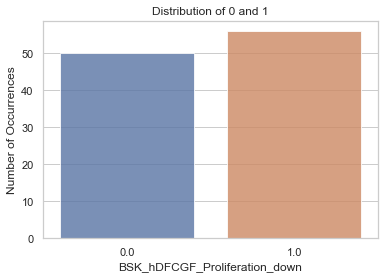

Total Compounds in Assay:  106
pca explained variance by first two components:  0.7210227204267772


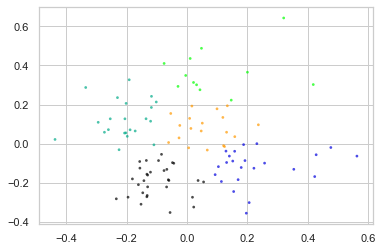

Start
0    30
1    23
2    22
4    19
3    12
Name: Cluster_PC1_PC2, dtype: int64


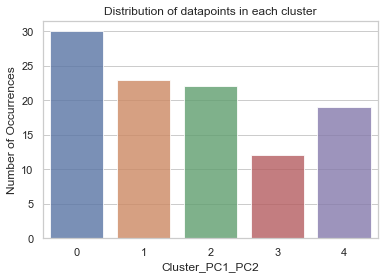

Total Selected CP features:  62
Total Selected train:  76
Total Selected test:  30
Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 120 tasks      | elapsed:    9.6s
[Parallel(n_jobs=40)]: Done 370 tasks      | elapsed:   23.7s
[Parallel(n_jobs=40)]: Done 720 tasks      | elapsed:   43.7s
[Parallel(n_jobs=40)]: Done 1170 tasks      | elapsed:  1.1min
[Parallel(n_jobs=40)]: Done 1720 tasks      | elapsed:  1.6min
[Parallel(n_jobs=40)]: Done 2370 tasks      | elapsed:  2.2min
[Parallel(n_jobs=40)]: Done 3120 tasks      | elapsed:  2.9min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  3.6min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=700,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[ 6 16]
 [ 2  6]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.75      0.27      0.40        22
         1.0       0.27      0.75      0.40         8

    accuracy                           0.40        30
   macro avg       0.51      0.51      0.40        30
weighted avg       0.62      0.40      0.40        30

Total Selected CP features:  49
Total Selec

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 120 tasks      | elapsed:    7.4s
[Parallel(n_jobs=40)]: Done 370 tasks      | elapsed:   21.7s
[Parallel(n_jobs=40)]: Done 720 tasks      | elapsed:   40.8s
[Parallel(n_jobs=40)]: Done 1170 tasks      | elapsed:  1.1min
[Parallel(n_jobs=40)]: Done 1720 tasks      | elapsed:  1.6min
[Parallel(n_jobs=40)]: Done 2370 tasks      | elapsed:  2.2min
[Parallel(n_jobs=40)]: Done 3120 tasks      | elapsed:  2.9min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  3.6min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[10  7]
 [ 0  6]]
classification_report: 
               precision    recall  f1-score   support

         0.0       1.00      0.59      0.74        17
         1.0       0.46      1.00      0.63         6

    accuracy                           0.70        23
   macro avg       0.73      0.79      0.69        23
weighted avg       0.86      0.70      0.71        23

Total Selected CP features:  269
Tot

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 120 tasks      | elapsed:    7.9s
[Parallel(n_jobs=40)]: Done 370 tasks      | elapsed:   22.2s
[Parallel(n_jobs=40)]: Done 720 tasks      | elapsed:   42.3s
[Parallel(n_jobs=40)]: Done 1170 tasks      | elapsed:  1.1min
[Parallel(n_jobs=40)]: Done 1720 tasks      | elapsed:  1.7min
[Parallel(n_jobs=40)]: Done 2370 tasks      | elapsed:  2.3min
[Parallel(n_jobs=40)]: Done 3120 tasks      | elapsed:  3.0min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  3.8min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[ 1  0]
 [15  6]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.06      1.00      0.12         1
         1.0       1.00      0.29      0.44        21

    accuracy                           0.32        22
   macro avg       0.53      0.64      0.28        22
weighted avg       0.96      0.32      0.43        22

Total Selected CP features:  125
Total S

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 120 tasks      | elapsed:    7.8s
[Parallel(n_jobs=40)]: Done 370 tasks      | elapsed:   21.7s
[Parallel(n_jobs=40)]: Done 720 tasks      | elapsed:   39.0s
[Parallel(n_jobs=40)]: Done 1170 tasks      | elapsed:  1.0min
[Parallel(n_jobs=40)]: Done 1720 tasks      | elapsed:  1.5min
[Parallel(n_jobs=40)]: Done 2370 tasks      | elapsed:  2.2min
[Parallel(n_jobs=40)]: Done 3120 tasks      | elapsed:  2.9min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  3.7min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[6 3]
 [6 4]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.50      0.67      0.57         9
         1.0       0.57      0.40      0.47        10

    accuracy                           0.53        19
   macro avg       0.54      0.53      0.52        19
weighted avg       0.54      0.53      0.52        19

Total Selected CP features:  31
Total Selected tr

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 120 tasks      | elapsed:    7.4s
[Parallel(n_jobs=40)]: Done 370 tasks      | elapsed:   21.1s
[Parallel(n_jobs=40)]: Done 720 tasks      | elapsed:   39.0s
[Parallel(n_jobs=40)]: Done 1170 tasks      | elapsed:  1.1min
[Parallel(n_jobs=40)]: Done 1720 tasks      | elapsed:  1.6min
[Parallel(n_jobs=40)]: Done 2370 tasks      | elapsed:  2.2min
[Parallel(n_jobs=40)]: Done 3120 tasks      | elapsed:  2.9min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  3.6min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[1 0]
 [2 9]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.33      1.00      0.50         1
         1.0       1.00      0.82      0.90        11

    accuracy                           0.83        12
   macro avg       0.67      0.91      0.70        12
weighted avg       0.94      0.83      0.87        12



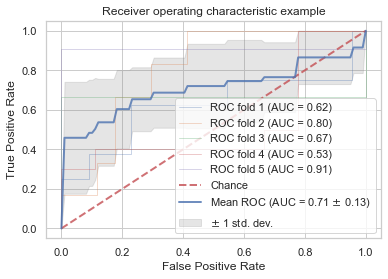

Mean of Each fold


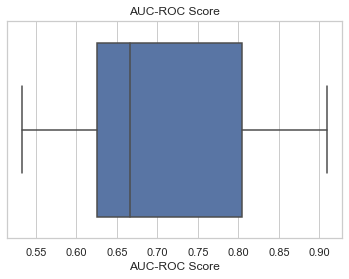

AUC-ROC all:  [0.625, 0.803921568627451, 0.6666666666666666, 0.5333333333333333, 0.9090909090909091]
AUC-ROC = 0.71 ± 0.13)


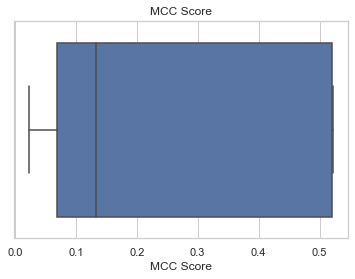

Matthews_corrcoef all:  [0.022727272727272728, 0.5210501057189061, 0.1336306209562122, 0.06900655593423542, 0.5222329678670935]
Matthews_corrcoef = 0.254 ± 0.222)


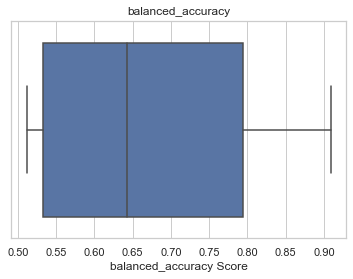

balanced_accuracy all:  [0.5113636363636364, 0.7941176470588236, 0.6428571428571428, 0.5333333333333333, 0.9090909090909092]
balanced_accuracy = 0.68 ± 0.15)


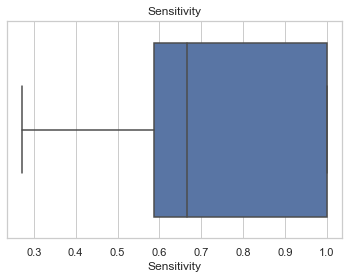

Sensitivity all:  [0.2727272727272727, 0.5882352941176471, 1.0, 0.6666666666666666, 1.0]
Sensitivity = 0.71 ± 0.27)


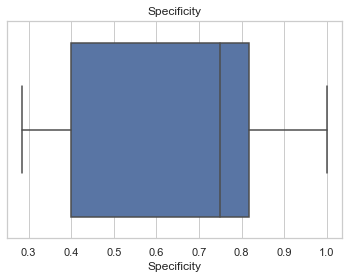

Specificity all:  [0.75, 1.0, 0.2857142857142857, 0.4, 0.8181818181818182]
Specificity = 0.65 ± 0.27)
One Combined Confusion Matrix
conf_matrix: 
  [[24 26]
 [25 31]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.49      0.48      0.48        50
         1.0       0.54      0.55      0.55        56

    accuracy                           0.52       106
   macro avg       0.52      0.52      0.52       106
weighted avg       0.52      0.52      0.52       106

matthews_corrcoef
0.03361347170446095
balanced_accuracy_score
0.5167857142857143
Sensitivity
0.48
Specificity
0.5535714285714286
AUC-ROC for the combined results: 


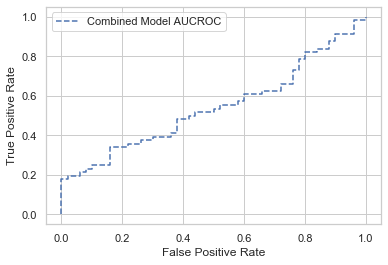

Combined Model AUC ROC:  0.5410714285714286
Start
1.0    45
0.0    43
Name: APR_HepG2_CellLoss_72h_dn, dtype: int64


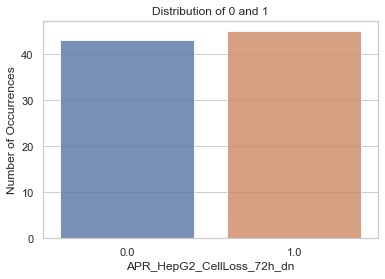

Total Compounds in Assay:  88
pca explained variance by first two components:  0.7196696700655922


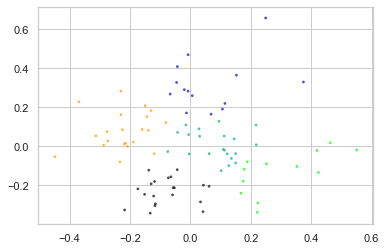

Start
4    21
2    21
0    20
1    14
3    12
Name: Cluster_PC1_PC2, dtype: int64


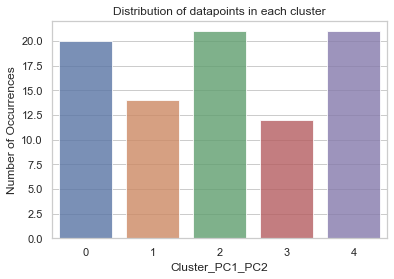

Total Selected CP features:  246
Total Selected train:  67
Total Selected test:  21
Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 120 tasks      | elapsed:    5.2s
[Parallel(n_jobs=40)]: Done 370 tasks      | elapsed:   18.1s
[Parallel(n_jobs=40)]: Done 720 tasks      | elapsed:   37.4s
[Parallel(n_jobs=40)]: Done 1170 tasks      | elapsed:  1.0min
[Parallel(n_jobs=40)]: Done 1720 tasks      | elapsed:  1.6min
[Parallel(n_jobs=40)]: Done 2370 tasks      | elapsed:  2.2min
[Parallel(n_jobs=40)]: Done 3120 tasks      | elapsed:  2.9min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  3.7min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[ 3  0]
 [14  4]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.18      1.00      0.30         3
         1.0       1.00      0.22      0.36        18

    accuracy                           0.33        21
   macro avg       0.59      0.61      0.33        21
weighted avg       0.88      0.33      0.35        21

Total Selected CP features:  92
Total Selecte

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 120 tasks      | elapsed:    7.2s
[Parallel(n_jobs=40)]: Done 370 tasks      | elapsed:   20.6s
[Parallel(n_jobs=40)]: Done 720 tasks      | elapsed:   39.7s
[Parallel(n_jobs=40)]: Done 1170 tasks      | elapsed:  1.1min
[Parallel(n_jobs=40)]: Done 1720 tasks      | elapsed:  1.6min
[Parallel(n_jobs=40)]: Done 2370 tasks      | elapsed:  2.2min
[Parallel(n_jobs=40)]: Done 3120 tasks      | elapsed:  2.9min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  3.6min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=700,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[5 7]
 [3 6]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.62      0.42      0.50        12
         1.0       0.46      0.67      0.55         9

    accuracy                           0.52        21
   macro avg       0.54      0.54      0.52        21
weighted avg       0.55      0.52      0.52        21

Total Selected CP features:  41
Total Selected 

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 120 tasks      | elapsed:    7.4s
[Parallel(n_jobs=40)]: Done 370 tasks      | elapsed:   20.3s
[Parallel(n_jobs=40)]: Done 720 tasks      | elapsed:   39.1s
[Parallel(n_jobs=40)]: Done 1170 tasks      | elapsed:  1.1min
[Parallel(n_jobs=40)]: Done 1720 tasks      | elapsed:  1.6min
[Parallel(n_jobs=40)]: Done 2370 tasks      | elapsed:  2.2min
[Parallel(n_jobs=40)]: Done 3120 tasks      | elapsed:  2.9min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  3.5min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=700,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[ 7 10]
 [ 1  2]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.88      0.41      0.56        17
         1.0       0.17      0.67      0.27         3

    accuracy                           0.45        20
   macro avg       0.52      0.54      0.41        20
weighted avg       0.77      0.45      0.52        20

Total Selected CP features:  44
Total Selected

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 120 tasks      | elapsed:    7.3s
[Parallel(n_jobs=40)]: Done 370 tasks      | elapsed:   20.5s
[Parallel(n_jobs=40)]: Done 720 tasks      | elapsed:   39.1s
[Parallel(n_jobs=40)]: Done 1170 tasks      | elapsed:  1.1min
[Parallel(n_jobs=40)]: Done 1720 tasks      | elapsed:  1.6min
[Parallel(n_jobs=40)]: Done 2370 tasks      | elapsed:  2.4min
[Parallel(n_jobs=40)]: Done 3120 tasks      | elapsed:  3.8min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  5.3min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=700,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[2 1]
 [4 7]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.33      0.67      0.44         3
         1.0       0.88      0.64      0.74        11

    accuracy                           0.64        14
   macro avg       0.60      0.65      0.59        14
weighted avg       0.76      0.64      0.67        14

Total Selected CP features:  83
Total Selected tra

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 120 tasks      | elapsed:   17.3s
[Parallel(n_jobs=40)]: Done 370 tasks      | elapsed:   47.4s
[Parallel(n_jobs=40)]: Done 720 tasks      | elapsed:  1.5min
[Parallel(n_jobs=40)]: Done 1170 tasks      | elapsed:  2.5min
[Parallel(n_jobs=40)]: Done 1720 tasks      | elapsed:  3.4min
[Parallel(n_jobs=40)]: Done 2370 tasks      | elapsed:  4.7min
[Parallel(n_jobs=40)]: Done 3120 tasks      | elapsed:  6.0min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.6min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[6 2]
 [2 2]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.75      0.75      0.75         8
         1.0       0.50      0.50      0.50         4

    accuracy                           0.67        12
   macro avg       0.62      0.62      0.62        12
weighted avg       0.67      0.67      0.67        12



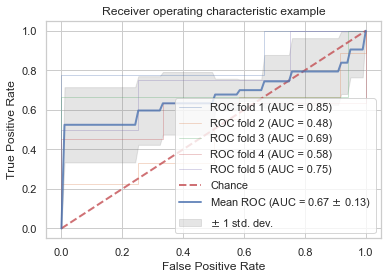

Mean of Each fold


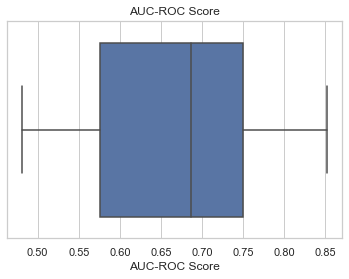

AUC-ROC all:  [0.8518518518518519, 0.4814814814814814, 0.6862745098039216, 0.5757575757575758, 0.75]
AUC-ROC = 0.67 ± 0.13)


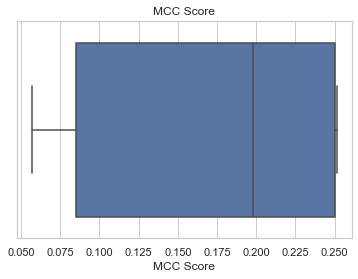

Matthews_corrcoef all:  [0.19802950859533489, 0.08492077756084468, 0.05716619504750295, 0.251259453814803, 0.25]
Matthews_corrcoef = 0.168 ± 0.082)


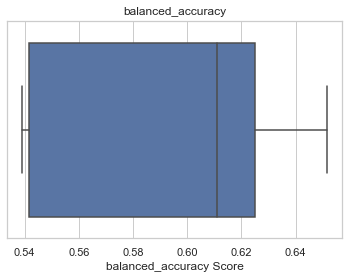

balanced_accuracy all:  [0.6111111111111112, 0.5416666666666666, 0.5392156862745098, 0.6515151515151515, 0.625]
balanced_accuracy = 0.59 ± 0.05)


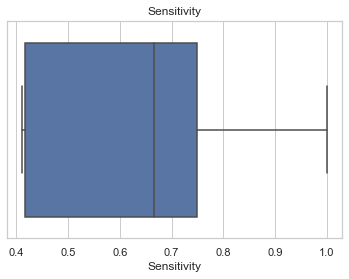

Sensitivity all:  [1.0, 0.4166666666666667, 0.4117647058823529, 0.6666666666666666, 0.75]
Sensitivity = 0.65 ± 0.22)


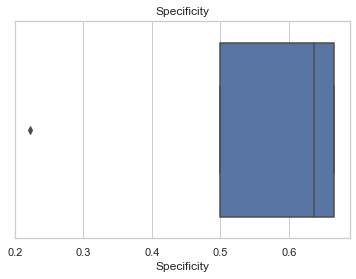

Specificity all:  [0.2222222222222222, 0.6666666666666666, 0.6666666666666666, 0.6363636363636364, 0.5]
Specificity = 0.54 ± 0.17)
One Combined Confusion Matrix
conf_matrix: 
  [[23 20]
 [24 21]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.49      0.53      0.51        43
         1.0       0.51      0.47      0.49        45

    accuracy                           0.50        88
   macro avg       0.50      0.50      0.50        88
weighted avg       0.50      0.50      0.50        88

matthews_corrcoef
0.0015536025046478897
balanced_accuracy_score
0.5007751937984496
Sensitivity
0.5348837209302325
Specificity
0.4666666666666667
AUC-ROC for the combined results: 


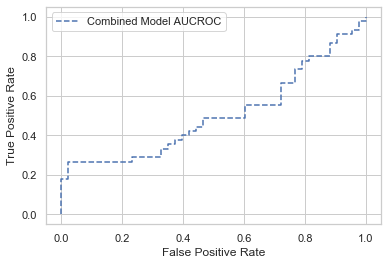

Combined Model AUC ROC:  0.5028423772609819
Start
1.0    54
0.0    52
Name: BSK_3C_Proliferation_down, dtype: int64


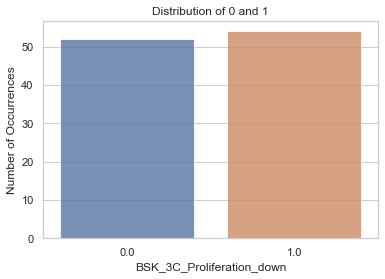

Total Compounds in Assay:  106
pca explained variance by first two components:  0.7210227204267772


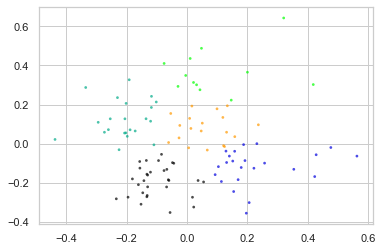

Start
0    30
1    23
2    22
4    19
3    12
Name: Cluster_PC1_PC2, dtype: int64


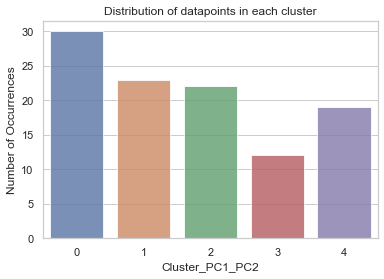

Total Selected CP features:  82
Total Selected train:  76
Total Selected test:  30
Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 120 tasks      | elapsed:   16.6s
[Parallel(n_jobs=40)]: Done 370 tasks      | elapsed:   47.0s
[Parallel(n_jobs=40)]: Done 720 tasks      | elapsed:  1.5min
[Parallel(n_jobs=40)]: Done 1170 tasks      | elapsed:  2.5min
[Parallel(n_jobs=40)]: Done 1720 tasks      | elapsed:  3.5min
[Parallel(n_jobs=40)]: Done 2370 tasks      | elapsed:  4.7min
[Parallel(n_jobs=40)]: Done 3120 tasks      | elapsed:  6.0min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.6min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[10  8]
 [ 5  7]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.67      0.56      0.61        18
         1.0       0.47      0.58      0.52        12

    accuracy                           0.57        30
   macro avg       0.57      0.57      0.56        30
weighted avg       0.59      0.57      0.57        30

Total Selected CP features:  55
Total Selected

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 120 tasks      | elapsed:   17.0s
[Parallel(n_jobs=40)]: Done 370 tasks      | elapsed:   48.7s
[Parallel(n_jobs=40)]: Done 720 tasks      | elapsed:  1.6min
[Parallel(n_jobs=40)]: Done 1170 tasks      | elapsed:  2.5min
[Parallel(n_jobs=40)]: Done 1720 tasks      | elapsed:  3.6min
[Parallel(n_jobs=40)]: Done 2370 tasks      | elapsed:  4.8min
[Parallel(n_jobs=40)]: Done 3120 tasks      | elapsed:  6.2min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.8min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[12  6]
 [ 1  4]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.92      0.67      0.77        18
         1.0       0.40      0.80      0.53         5

    accuracy                           0.70        23
   macro avg       0.66      0.73      0.65        23
weighted avg       0.81      0.70      0.72        23

Total Selected CP features:  172
Total 

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 120 tasks      | elapsed:   17.5s
[Parallel(n_jobs=40)]: Done 370 tasks      | elapsed:   47.8s
[Parallel(n_jobs=40)]: Done 720 tasks      | elapsed:  1.5min
[Parallel(n_jobs=40)]: Done 1170 tasks      | elapsed:  2.5min
[Parallel(n_jobs=40)]: Done 1720 tasks      | elapsed:  3.6min
[Parallel(n_jobs=40)]: Done 2370 tasks      | elapsed:  4.8min
[Parallel(n_jobs=40)]: Done 3120 tasks      | elapsed:  6.2min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.8min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[ 2  0]
 [12  8]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.14      1.00      0.25         2
         1.0       1.00      0.40      0.57        20

    accuracy                           0.45        22
   macro avg       0.57      0.70      0.41        22
weighted avg       0.92      0.45      0.54        22

Total Selected CP features:  60
Total Selected

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 120 tasks      | elapsed:   13.9s
[Parallel(n_jobs=40)]: Done 370 tasks      | elapsed:   38.9s
[Parallel(n_jobs=40)]: Done 720 tasks      | elapsed:  1.4min
[Parallel(n_jobs=40)]: Done 1170 tasks      | elapsed:  2.3min
[Parallel(n_jobs=40)]: Done 1720 tasks      | elapsed:  3.4min
[Parallel(n_jobs=40)]: Done 2370 tasks      | elapsed:  4.6min
[Parallel(n_jobs=40)]: Done 3120 tasks      | elapsed:  6.0min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.5min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[5 7]
 [2 5]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.71      0.42      0.53        12
         1.0       0.42      0.71      0.53         7

    accuracy                           0.53        19
   macro avg       0.57      0.57      0.53        19
weighted avg       0.60      0.53      0.53        19

Total Selected CP features:  25
Total Se

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 120 tasks      | elapsed:   17.2s
[Parallel(n_jobs=40)]: Done 370 tasks      | elapsed:   50.8s
[Parallel(n_jobs=40)]: Done 720 tasks      | elapsed:  1.6min
[Parallel(n_jobs=40)]: Done 1170 tasks      | elapsed:  2.4min
[Parallel(n_jobs=40)]: Done 1720 tasks      | elapsed:  3.6min
[Parallel(n_jobs=40)]: Done 2370 tasks      | elapsed:  4.8min
[Parallel(n_jobs=40)]: Done 3120 tasks      | elapsed:  6.3min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.7min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[2 0]
 [3 7]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.40      1.00      0.57         2
         1.0       1.00      0.70      0.82        10

    accuracy                           0.75        12
   macro avg       0.70      0.85      0.70        12
weighted avg       0.90      0.75      0.78        12



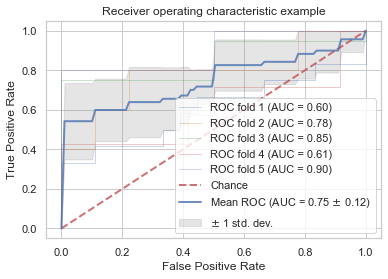

Mean of Each fold


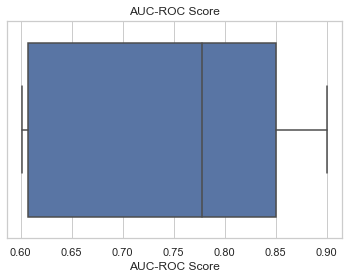

AUC-ROC all:  [0.6018518518518519, 0.7777777777777778, 0.85, 0.6071428571428572, 0.9]
AUC-ROC = 0.75 ± 0.12)


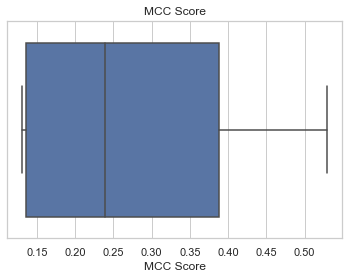

Matthews_corrcoef all:  [0.13608276348795434, 0.3882901373576604, 0.23904572186687872, 0.13095238095238096, 0.5291502622129182]
Matthews_corrcoef = 0.285 ± 0.154)


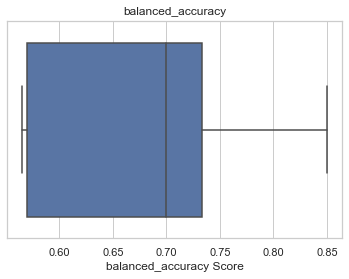

balanced_accuracy all:  [0.5694444444444444, 0.7333333333333334, 0.7, 0.5654761904761905, 0.85]
balanced_accuracy = 0.68 ± 0.11)


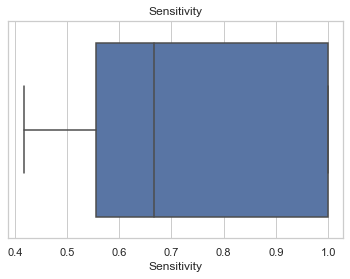

Sensitivity all:  [0.5555555555555556, 0.6666666666666666, 1.0, 0.4166666666666667, 1.0]
Sensitivity = 0.73 ± 0.24)


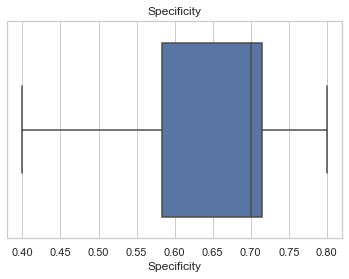

Specificity all:  [0.5833333333333334, 0.8, 0.4, 0.7142857142857143, 0.7]
Specificity = 0.64 ± 0.14)
One Combined Confusion Matrix
conf_matrix: 
  [[31 21]
 [23 31]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.57      0.60      0.58        52
         1.0       0.60      0.57      0.58        54

    accuracy                           0.58       106
   macro avg       0.59      0.59      0.58       106
weighted avg       0.59      0.58      0.58       106

matthews_corrcoef
0.17022792022792022
balanced_accuracy_score
0.5851139601139601
Sensitivity
0.5961538461538461
Specificity
0.5740740740740741
AUC-ROC for the combined results: 


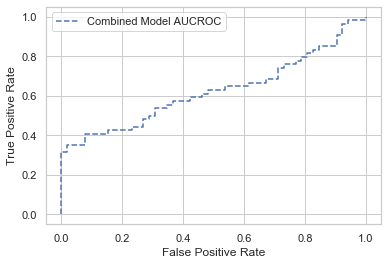

Combined Model AUC ROC:  0.6235754985754987
Start
0.0    58
1.0    48
Name: BSK_SAg_Proliferation_down, dtype: int64


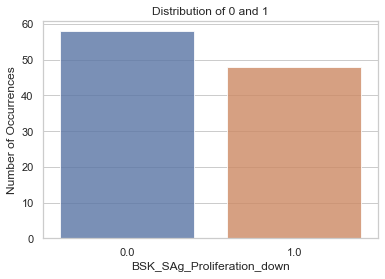

Total Compounds in Assay:  106
pca explained variance by first two components:  0.7210227204267772


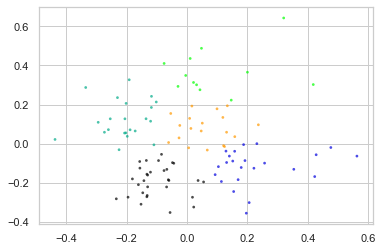

Start
0    30
1    23
2    22
4    19
3    12
Name: Cluster_PC1_PC2, dtype: int64


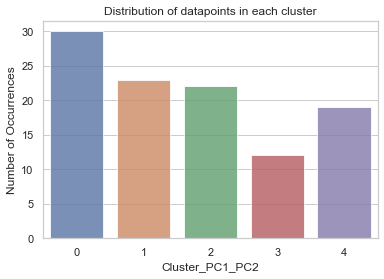

Total Selected CP features:  81
Total Selected train:  76
Total Selected test:  30
Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 120 tasks      | elapsed:   16.5s
[Parallel(n_jobs=40)]: Done 370 tasks      | elapsed:   45.0s
[Parallel(n_jobs=40)]: Done 720 tasks      | elapsed:  1.5min
[Parallel(n_jobs=40)]: Done 1170 tasks      | elapsed:  2.4min
[Parallel(n_jobs=40)]: Done 1720 tasks      | elapsed:  3.4min
[Parallel(n_jobs=40)]: Done 2370 tasks      | elapsed:  4.7min
[Parallel(n_jobs=40)]: Done 3120 tasks      | elapsed:  6.1min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.6min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[15  8]
 [ 3  4]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.83      0.65      0.73        23
         1.0       0.33      0.57      0.42         7

    accuracy                           0.63        30
   macro avg       0.58      0.61      0.58        30
weighted avg       0.72      0.63      0.66        30

Total Selected CP features:  129
Tota

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 120 tasks      | elapsed:   16.4s
[Parallel(n_jobs=40)]: Done 370 tasks      | elapsed:   46.8s
[Parallel(n_jobs=40)]: Done 720 tasks      | elapsed:  1.5min
[Parallel(n_jobs=40)]: Done 1170 tasks      | elapsed:  2.5min
[Parallel(n_jobs=40)]: Done 1720 tasks      | elapsed:  3.5min
[Parallel(n_jobs=40)]: Done 2370 tasks      | elapsed:  4.9min
[Parallel(n_jobs=40)]: Done 3120 tasks      | elapsed:  6.2min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.8min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=700,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[11  6]
 [ 1  5]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.92      0.65      0.76        17
         1.0       0.45      0.83      0.59         6

    accuracy                           0.70        23
   macro avg       0.69      0.74      0.67        23
weighted avg       0.80      0.70      0.71        23

Total Selected CP features:  357
Total Selecte

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 120 tasks      | elapsed:   16.8s
[Parallel(n_jobs=40)]: Done 370 tasks      | elapsed:   47.9s
[Parallel(n_jobs=40)]: Done 720 tasks      | elapsed:  1.6min
[Parallel(n_jobs=40)]: Done 1170 tasks      | elapsed:  2.5min
[Parallel(n_jobs=40)]: Done 1720 tasks      | elapsed:  3.6min
[Parallel(n_jobs=40)]: Done 2370 tasks      | elapsed:  4.9min
[Parallel(n_jobs=40)]: Done 3120 tasks      | elapsed:  6.3min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.9min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=15, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[ 4  0]
 [16  2]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.20      1.00      0.33         4
         1.0       1.00      0.11      0.20        18

    accuracy                           0.27        22
   macro avg       0.60      0.56      0.27        22
weighted avg       0.85      0.27      0.22        22

Total Selected CP features:  183
Total Select

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 120 tasks      | elapsed:   17.1s
[Parallel(n_jobs=40)]: Done 370 tasks      | elapsed:   49.6s
[Parallel(n_jobs=40)]: Done 720 tasks      | elapsed:  1.6min
[Parallel(n_jobs=40)]: Done 1170 tasks      | elapsed:  2.5min
[Parallel(n_jobs=40)]: Done 1720 tasks      | elapsed:  3.5min
[Parallel(n_jobs=40)]: Done 2370 tasks      | elapsed:  4.8min
[Parallel(n_jobs=40)]: Done 3120 tasks      | elapsed:  6.1min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.7min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=700,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[7 5]
 [4 3]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.64      0.58      0.61        12
         1.0       0.38      0.43      0.40         7

    accuracy                           0.53        19
   macro avg       0.51      0.51      0.50        19
weighted avg       0.54      0.53      0.53        19

Total Selected CP features:  116
Total Selected

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 120 tasks      | elapsed:   16.8s
[Parallel(n_jobs=40)]: Done 370 tasks      | elapsed:   48.3s
[Parallel(n_jobs=40)]: Done 720 tasks      | elapsed:  1.5min
[Parallel(n_jobs=40)]: Done 1170 tasks      | elapsed:  2.5min
[Parallel(n_jobs=40)]: Done 1720 tasks      | elapsed:  3.5min
[Parallel(n_jobs=40)]: Done 2370 tasks      | elapsed:  4.8min
[Parallel(n_jobs=40)]: Done 3120 tasks      | elapsed:  6.2min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.9min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[1 1]
 [5 5]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.17      0.50      0.25         2
         1.0       0.83      0.50      0.62        10

    accuracy                           0.50        12
   macro avg       0.50      0.50      0.44        12
weighted avg       0.72      0.50      0.56        12



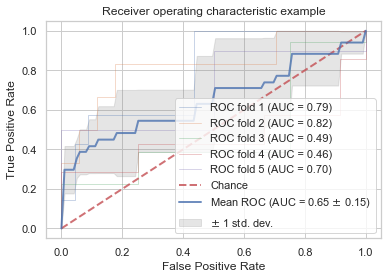

Mean of Each fold


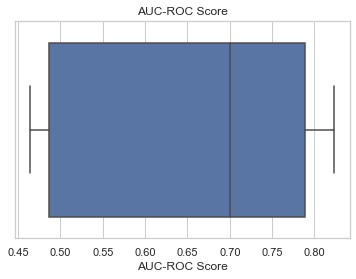

AUC-ROC all:  [0.7888198757763976, 0.8235294117647058, 0.48611111111111116, 0.46428571428571425, 0.7]
AUC-ROC = 0.65 ± 0.15)


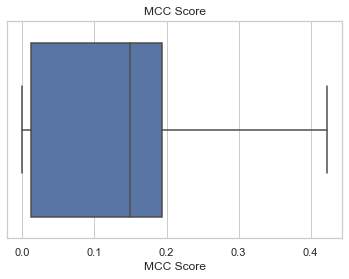

Matthews_corrcoef all:  [0.19304683562633607, 0.422288280162599, 0.14907119849998599, 0.011631052629980886, 0.0]
Matthews_corrcoef = 0.155 ± 0.153)


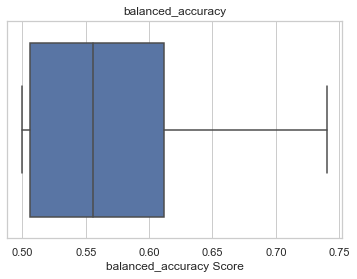

balanced_accuracy all:  [0.6118012422360248, 0.7401960784313726, 0.5555555555555556, 0.5059523809523809, 0.5]
balanced_accuracy = 0.58 ± 0.09)


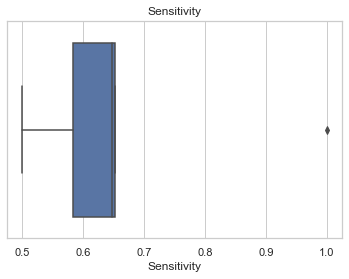

Sensitivity all:  [0.6521739130434783, 0.6470588235294118, 1.0, 0.5833333333333334, 0.5]
Sensitivity = 0.68 ± 0.17)


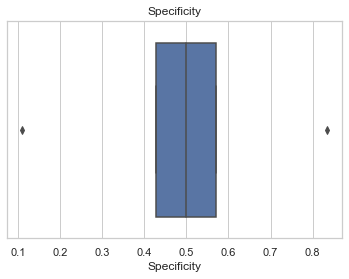

Specificity all:  [0.5714285714285714, 0.8333333333333334, 0.1111111111111111, 0.42857142857142855, 0.5]
Specificity = 0.49 ± 0.23)
One Combined Confusion Matrix
conf_matrix: 
  [[38 20]
 [29 19]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.57      0.66      0.61        58
         1.0       0.49      0.40      0.44        48

    accuracy                           0.54       106
   macro avg       0.53      0.53      0.52       106
weighted avg       0.53      0.54      0.53       106

matthews_corrcoef
0.05264826018401155
balanced_accuracy_score
0.5255028735632183
Sensitivity
0.6551724137931034
Specificity
0.3958333333333333
AUC-ROC for the combined results: 


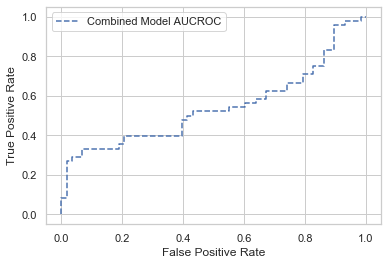

Combined Model AUC ROC:  0.5423850574712643
Start
0.0    61
1.0    45
Name: BSK_3C_SRB_down, dtype: int64


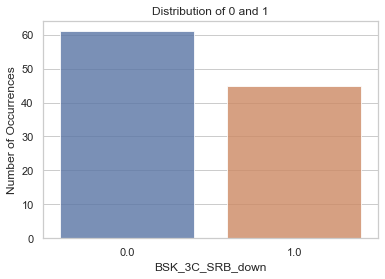

Total Compounds in Assay:  106
pca explained variance by first two components:  0.7210227204267772


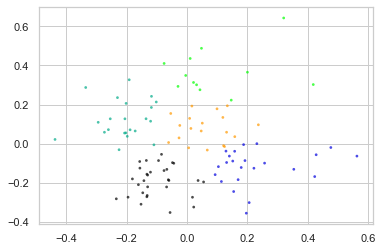

Start
0    30
1    23
2    22
4    19
3    12
Name: Cluster_PC1_PC2, dtype: int64


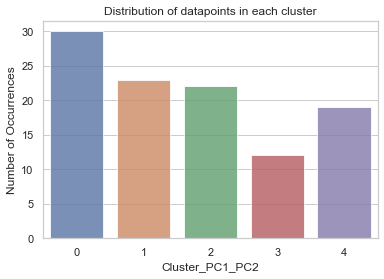

Total Selected CP features:  30
Total Selected train:  76
Total Selected test:  30
Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 120 tasks      | elapsed:   16.6s
[Parallel(n_jobs=40)]: Done 370 tasks      | elapsed:   47.3s
[Parallel(n_jobs=40)]: Done 720 tasks      | elapsed:  1.5min
[Parallel(n_jobs=40)]: Done 1170 tasks      | elapsed:  2.3min
[Parallel(n_jobs=40)]: Done 1720 tasks      | elapsed:  3.3min
[Parallel(n_jobs=40)]: Done 2370 tasks      | elapsed:  4.6min
[Parallel(n_jobs=40)]: Done 3120 tasks      | elapsed:  6.1min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.7min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[12 10]
 [ 4  4]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.75      0.55      0.63        22
         1.0       0.29      0.50      0.36         8

    accuracy                           0.53        30
   macro avg       0.52      0.52      0.50        30
weighted avg       0.63      0.53      0.56        30

Total Selected CP features:  18
Total Sele

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 120 tasks      | elapsed:   15.9s
[Parallel(n_jobs=40)]: Done 370 tasks      | elapsed:   47.0s
[Parallel(n_jobs=40)]: Done 720 tasks      | elapsed:  1.5min
[Parallel(n_jobs=40)]: Done 1170 tasks      | elapsed:  2.4min
[Parallel(n_jobs=40)]: Done 1720 tasks      | elapsed:  3.2min
[Parallel(n_jobs=40)]: Done 2370 tasks      | elapsed:  4.5min
[Parallel(n_jobs=40)]: Done 3120 tasks      | elapsed:  6.0min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.6min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[13  6]
 [ 1  3]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.93      0.68      0.79        19
         1.0       0.33      0.75      0.46         4

    accuracy                           0.70        23
   macro avg       0.63      0.72      0.62        23
weighted avg       0.83      0.70      0.73        23

Total Selected CP features:  125
Total S

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 120 tasks      | elapsed:   17.5s
[Parallel(n_jobs=40)]: Done 370 tasks      | elapsed:   50.4s
[Parallel(n_jobs=40)]: Done 720 tasks      | elapsed:  1.6min
[Parallel(n_jobs=40)]: Done 1170 tasks      | elapsed:  2.4min
[Parallel(n_jobs=40)]: Done 1720 tasks      | elapsed:  3.5min
[Parallel(n_jobs=40)]: Done 2370 tasks      | elapsed:  4.7min
[Parallel(n_jobs=40)]: Done 3120 tasks      | elapsed:  6.3min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.8min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[ 3  0]
 [17  2]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.15      1.00      0.26         3
         1.0       1.00      0.11      0.19        19

    accuracy                           0.23        22
   macro avg       0.57      0.55      0.23        22
weighted avg       0.88      0.23      0.20        22

Total Selected CP features:  25
Total Selecte

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 120 tasks      | elapsed:   16.6s
[Parallel(n_jobs=40)]: Done 370 tasks      | elapsed:   47.3s
[Parallel(n_jobs=40)]: Done 720 tasks      | elapsed:  1.5min
[Parallel(n_jobs=40)]: Done 1170 tasks      | elapsed:  2.3min
[Parallel(n_jobs=40)]: Done 1720 tasks      | elapsed:  3.4min
[Parallel(n_jobs=40)]: Done 2370 tasks      | elapsed:  4.6min
[Parallel(n_jobs=40)]: Done 3120 tasks      | elapsed:  6.0min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.5min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=15, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[7 5]
 [4 3]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.64      0.58      0.61        12
         1.0       0.38      0.43      0.40         7

    accuracy                           0.53        19
   macro avg       0.51      0.51      0.50        19
weighted avg       0.54      0.53      0.53        19

Total Selected CP features:  22
Total Selec

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 120 tasks      | elapsed:   16.5s
[Parallel(n_jobs=40)]: Done 370 tasks      | elapsed:   44.2s
[Parallel(n_jobs=40)]: Done 720 tasks      | elapsed:  1.5min
[Parallel(n_jobs=40)]: Done 1170 tasks      | elapsed:  2.3min
[Parallel(n_jobs=40)]: Done 1720 tasks      | elapsed:  3.3min
[Parallel(n_jobs=40)]: Done 2370 tasks      | elapsed:  4.7min
[Parallel(n_jobs=40)]: Done 3120 tasks      | elapsed:  6.1min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.7min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[4 1]
 [3 4]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.57      0.80      0.67         5
         1.0       0.80      0.57      0.67         7

    accuracy                           0.67        12
   macro avg       0.69      0.69      0.67        12
weighted avg       0.70      0.67      0.67        12



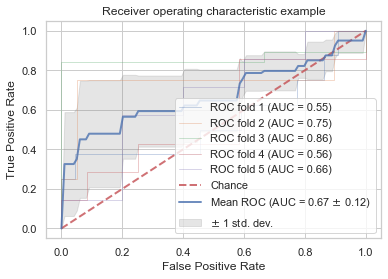

Mean of Each fold


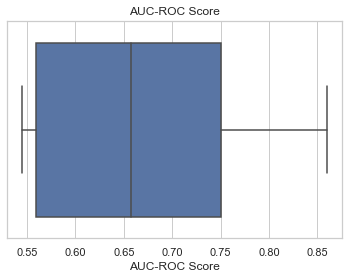

AUC-ROC all:  [0.5454545454545454, 0.75, 0.8596491228070176, 0.5595238095238095, 0.657142857142857]
AUC-ROC = 0.67 ± 0.12)


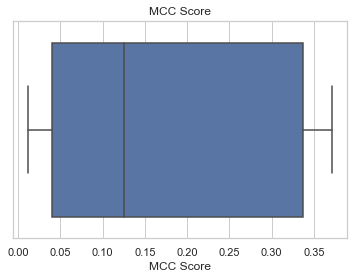

Matthews_corrcoef all:  [0.040291148201269014, 0.3372266367167312, 0.12565617248750865, 0.011631052629980886, 0.37142857142857144]
Matthews_corrcoef = 0.177 ± 0.150)


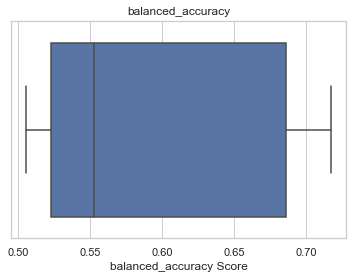

balanced_accuracy all:  [0.5227272727272727, 0.7171052631578947, 0.5526315789473684, 0.5059523809523809, 0.6857142857142857]
balanced_accuracy = 0.60 ± 0.09)


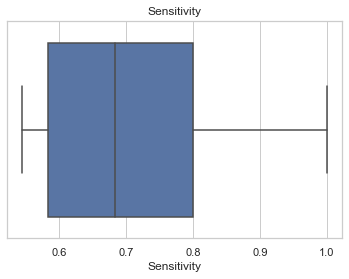

Sensitivity all:  [0.5454545454545454, 0.6842105263157895, 1.0, 0.5833333333333334, 0.8]
Sensitivity = 0.72 ± 0.16)


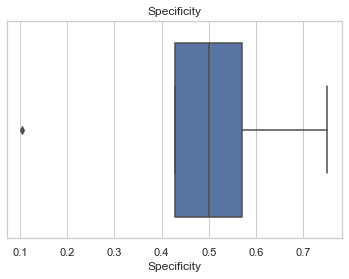

Specificity all:  [0.5, 0.75, 0.10526315789473684, 0.42857142857142855, 0.5714285714285714]
Specificity = 0.47 ± 0.21)
One Combined Confusion Matrix
conf_matrix: 
  [[39 22]
 [29 16]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.57      0.64      0.60        61
         1.0       0.42      0.36      0.39        45

    accuracy                           0.52       106
   macro avg       0.50      0.50      0.50       106
weighted avg       0.51      0.52      0.51       106

matthews_corrcoef
-0.005256668700300534
balanced_accuracy_score
0.4974499089253188
Sensitivity
0.639344262295082
Specificity
0.35555555555555557
AUC-ROC for the combined results: 


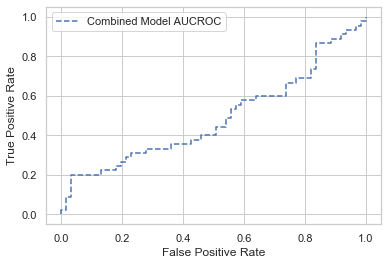

Combined Model AUC ROC:  0.48816029143897993
Start
0.0    65
1.0    41
Name: BSK_3C_Vis_down, dtype: int64


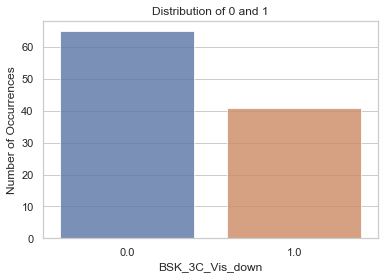

Total Compounds in Assay:  106
pca explained variance by first two components:  0.7210227204267772


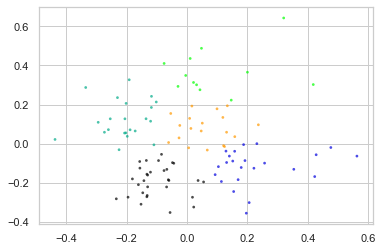

Start
0    30
1    23
2    22
4    19
3    12
Name: Cluster_PC1_PC2, dtype: int64


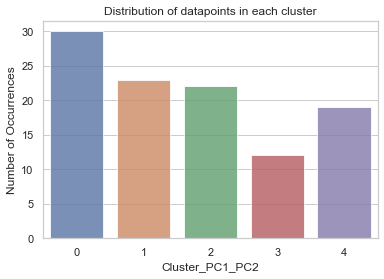

Total Selected CP features:  87
Total Selected train:  76
Total Selected test:  30
Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 120 tasks      | elapsed:   17.0s
[Parallel(n_jobs=40)]: Done 370 tasks      | elapsed:   50.0s
[Parallel(n_jobs=40)]: Done 720 tasks      | elapsed:  1.6min
[Parallel(n_jobs=40)]: Done 1170 tasks      | elapsed:  2.4min
[Parallel(n_jobs=40)]: Done 1720 tasks      | elapsed:  3.5min
[Parallel(n_jobs=40)]: Done 2370 tasks      | elapsed:  4.8min
[Parallel(n_jobs=40)]: Done 3120 tasks      | elapsed:  6.3min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.9min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[22  1]
 [ 2  5]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.92      0.96      0.94        23
         1.0       0.83      0.71      0.77         7

    accuracy                           0.90        30
   macro avg       0.88      0.84      0.85        30
weighted avg       0.90      0.90      0.90        30

Total Selected CP features:  142
Total Sele

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 120 tasks      | elapsed:   17.3s
[Parallel(n_jobs=40)]: Done 370 tasks      | elapsed:   49.7s
[Parallel(n_jobs=40)]: Done 720 tasks      | elapsed:  1.6min
[Parallel(n_jobs=40)]: Done 1170 tasks      | elapsed:  2.4min
[Parallel(n_jobs=40)]: Done 1720 tasks      | elapsed:  3.5min
[Parallel(n_jobs=40)]: Done 2370 tasks      | elapsed:  4.7min
[Parallel(n_jobs=40)]: Done 3120 tasks      | elapsed:  6.2min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.8min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[16  3]
 [ 0  4]]
classification_report: 
               precision    recall  f1-score   support

         0.0       1.00      0.84      0.91        19
         1.0       0.57      1.00      0.73         4

    accuracy                           0.87        23
   macro avg       0.79      0.92      0.82        23
weighted avg       0.93      0.87      0.88        23

Total Selected CP features:  430
Tota

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 120 tasks      | elapsed:   18.5s
[Parallel(n_jobs=40)]: Done 370 tasks      | elapsed:   51.2s
[Parallel(n_jobs=40)]: Done 720 tasks      | elapsed:  1.6min
[Parallel(n_jobs=40)]: Done 1170 tasks      | elapsed:  2.5min
[Parallel(n_jobs=40)]: Done 1720 tasks      | elapsed:  3.6min
[Parallel(n_jobs=40)]: Done 2370 tasks      | elapsed:  4.9min
[Parallel(n_jobs=40)]: Done 3120 tasks      | elapsed:  6.4min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  8.1min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[ 3  1]
 [13  5]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.19      0.75      0.30         4
         1.0       0.83      0.28      0.42        18

    accuracy                           0.36        22
   macro avg       0.51      0.51      0.36        22
weighted avg       0.72      0.36      0.40        22

Total Selected CP features:  119
Tota

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 120 tasks      | elapsed:   16.8s
[Parallel(n_jobs=40)]: Done 370 tasks      | elapsed:   48.7s
[Parallel(n_jobs=40)]: Done 720 tasks      | elapsed:  1.6min
[Parallel(n_jobs=40)]: Done 1170 tasks      | elapsed:  2.3min
[Parallel(n_jobs=40)]: Done 1720 tasks      | elapsed:  3.4min
[Parallel(n_jobs=40)]: Done 2370 tasks      | elapsed:  4.6min
[Parallel(n_jobs=40)]: Done 3120 tasks      | elapsed:  6.1min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.7min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[11  3]
 [ 1  4]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.92      0.79      0.85        14
         1.0       0.57      0.80      0.67         5

    accuracy                           0.79        19
   macro avg       0.74      0.79      0.76        19
weighted avg       0.83      0.79      0.80        19

Total Selected CP features:  125
Total Sele

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 120 tasks      | elapsed:   17.7s
[Parallel(n_jobs=40)]: Done 370 tasks      | elapsed:   49.2s
[Parallel(n_jobs=40)]: Done 720 tasks      | elapsed:  1.6min
[Parallel(n_jobs=40)]: Done 1170 tasks      | elapsed:  2.4min
[Parallel(n_jobs=40)]: Done 1720 tasks      | elapsed:  3.5min
[Parallel(n_jobs=40)]: Done 2370 tasks      | elapsed:  4.7min
[Parallel(n_jobs=40)]: Done 3120 tasks      | elapsed:  6.2min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.8min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[4 1]
 [2 5]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.67      0.80      0.73         5
         1.0       0.83      0.71      0.77         7

    accuracy                           0.75        12
   macro avg       0.75      0.76      0.75        12
weighted avg       0.76      0.75      0.75        12



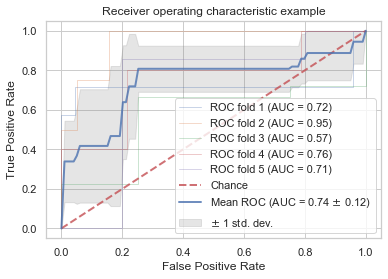

Mean of Each fold


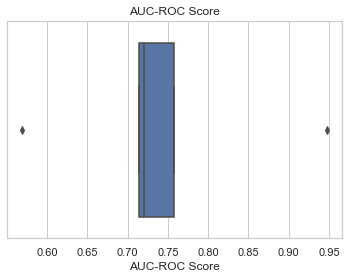

AUC-ROC all:  [0.7204968944099379, 0.9473684210526315, 0.5694444444444444, 0.7571428571428571, 0.7142857142857143]
AUC-ROC = 0.74 ± 0.12)


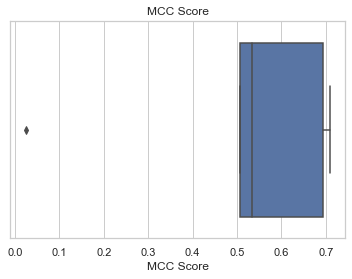

Matthews_corrcoef all:  [0.7092993656151906, 0.693687975619296, 0.024056261216234408, 0.5346815442312336, 0.50709255283711]
Matthews_corrcoef = 0.494 ± 0.249)


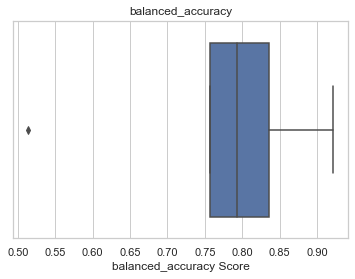

balanced_accuracy all:  [0.8354037267080745, 0.9210526315789473, 0.5138888888888888, 0.7928571428571429, 0.7571428571428571]
balanced_accuracy = 0.76 ± 0.14)


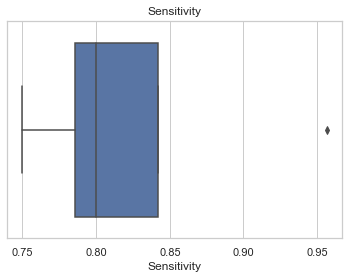

Sensitivity all:  [0.9565217391304348, 0.8421052631578947, 0.75, 0.7857142857142857, 0.8]
Sensitivity = 0.83 ± 0.07)


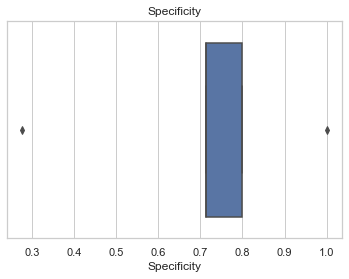

Specificity all:  [0.7142857142857143, 1.0, 0.2777777777777778, 0.8, 0.7142857142857143]
Specificity = 0.70 ± 0.24)
One Combined Confusion Matrix
conf_matrix: 
  [[56  9]
 [18 23]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.76      0.86      0.81        65
         1.0       0.72      0.56      0.63        41

    accuracy                           0.75       106
   macro avg       0.74      0.71      0.72       106
weighted avg       0.74      0.75      0.74       106

matthews_corrcoef
0.4482279506293298
balanced_accuracy_score
0.7112570356472796
Sensitivity
0.8615384615384616
Specificity
0.5609756097560976
AUC-ROC for the combined results: 


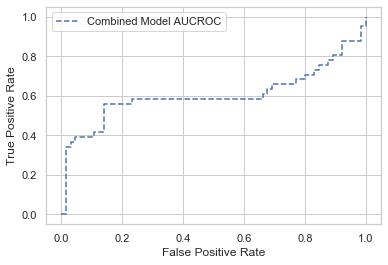

Combined Model AUC ROC:  0.6041275797373357
Start
0.0    55
1.0    33
Name: APR_HepG2_CellLoss_24h_dn, dtype: int64


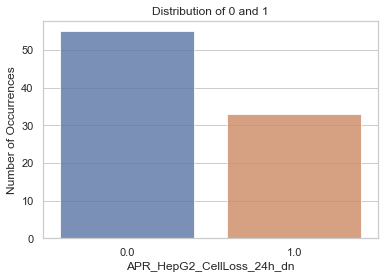

Total Compounds in Assay:  88
pca explained variance by first two components:  0.7196696700655922


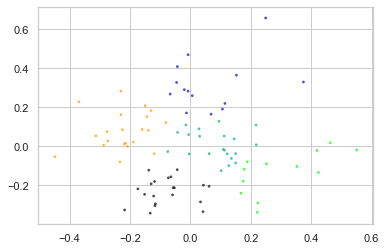

Start
4    21
2    21
0    20
1    14
3    12
Name: Cluster_PC1_PC2, dtype: int64


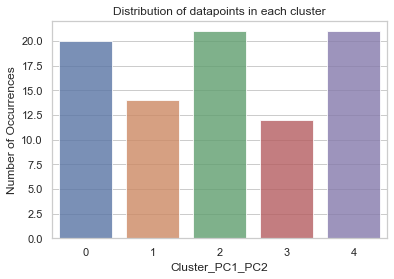

Total Selected CP features:  567
Total Selected train:  67
Total Selected test:  21
Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 120 tasks      | elapsed:   17.0s
[Parallel(n_jobs=40)]: Done 370 tasks      | elapsed:   48.7s
[Parallel(n_jobs=40)]: Done 720 tasks      | elapsed:  1.5min
[Parallel(n_jobs=40)]: Done 1170 tasks      | elapsed:  2.3min
[Parallel(n_jobs=40)]: Done 1720 tasks      | elapsed:  3.3min
[Parallel(n_jobs=40)]: Done 2370 tasks      | elapsed:  4.5min
[Parallel(n_jobs=40)]: Done 3120 tasks      | elapsed:  6.2min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.8min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[ 5  0]
 [14  2]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.26      1.00      0.42         5
         1.0       1.00      0.12      0.22        16

    accuracy                           0.33        21
   macro avg       0.63      0.56      0.32        21
weighted avg       0.82      0.33      0.27        21

Total Selected CP features:  224
Tota

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 120 tasks      | elapsed:   17.4s
[Parallel(n_jobs=40)]: Done 370 tasks      | elapsed:   48.5s
[Parallel(n_jobs=40)]: Done 720 tasks      | elapsed:  1.5min
[Parallel(n_jobs=40)]: Done 1170 tasks      | elapsed:  2.2min
[Parallel(n_jobs=40)]: Done 1720 tasks      | elapsed:  3.4min
[Parallel(n_jobs=40)]: Done 2370 tasks      | elapsed:  4.6min
[Parallel(n_jobs=40)]: Done 3120 tasks      | elapsed:  6.2min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.7min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[15  1]
 [ 4  1]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.79      0.94      0.86        16
         1.0       0.50      0.20      0.29         5

    accuracy                           0.76        21
   macro avg       0.64      0.57      0.57        21
weighted avg       0.72      0.76      0.72        21

Total Selected CP features:  97
Total Selected

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 120 tasks      | elapsed:   17.2s
[Parallel(n_jobs=40)]: Done 370 tasks      | elapsed:   48.8s
[Parallel(n_jobs=40)]: Done 720 tasks      | elapsed:  1.4min
[Parallel(n_jobs=40)]: Done 1170 tasks      | elapsed:  2.2min
[Parallel(n_jobs=40)]: Done 1720 tasks      | elapsed:  3.3min
[Parallel(n_jobs=40)]: Done 2370 tasks      | elapsed:  4.5min
[Parallel(n_jobs=40)]: Done 3120 tasks      | elapsed:  6.1min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.6min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[15  3]
 [ 0  2]]
classification_report: 
               precision    recall  f1-score   support

         0.0       1.00      0.83      0.91        18
         1.0       0.40      1.00      0.57         2

    accuracy                           0.85        20
   macro avg       0.70      0.92      0.74        20
weighted avg       0.94      0.85      0.88        20

Total Selected CP features:  47
Total

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 120 tasks      | elapsed:   16.7s
[Parallel(n_jobs=40)]: Done 370 tasks      | elapsed:   44.2s
[Parallel(n_jobs=40)]: Done 720 tasks      | elapsed:  1.4min
[Parallel(n_jobs=40)]: Done 1170 tasks      | elapsed:  2.2min
[Parallel(n_jobs=40)]: Done 1720 tasks      | elapsed:  3.3min
[Parallel(n_jobs=40)]: Done 2370 tasks      | elapsed:  4.5min
[Parallel(n_jobs=40)]: Done 3120 tasks      | elapsed:  5.9min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.5min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[7 0]
 [1 6]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.88      1.00      0.93         7
         1.0       1.00      0.86      0.92         7

    accuracy                           0.93        14
   macro avg       0.94      0.93      0.93        14
weighted avg       0.94      0.93      0.93        14

Total Selected CP features:  229
Total Selected tr

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 120 tasks      | elapsed:   17.3s
[Parallel(n_jobs=40)]: Done 370 tasks      | elapsed:   48.3s
[Parallel(n_jobs=40)]: Done 720 tasks      | elapsed:  1.5min
[Parallel(n_jobs=40)]: Done 1170 tasks      | elapsed:  2.4min
[Parallel(n_jobs=40)]: Done 1720 tasks      | elapsed:  3.5min
[Parallel(n_jobs=40)]: Done 2370 tasks      | elapsed:  4.9min
[Parallel(n_jobs=40)]: Done 3120 tasks      | elapsed:  6.3min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.9min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[8 1]
 [2 1]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.80      0.89      0.84         9
         1.0       0.50      0.33      0.40         3

    accuracy                           0.75        12
   macro avg       0.65      0.61      0.62        12
weighted avg       0.72      0.75      0.73        12



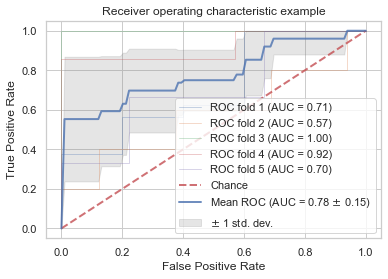

Mean of Each fold


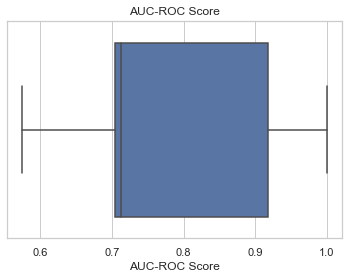

AUC-ROC all:  [0.7125, 0.575, 1.0, 0.9183673469387754, 0.7037037037037037]
AUC-ROC = 0.78 ± 0.15)


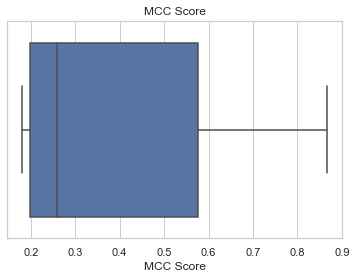

Matthews_corrcoef all:  [0.18136906252750293, 0.1995059687802532, 0.5773502691896257, 0.8660254037844387, 0.25819888974716115]
Matthews_corrcoef = 0.416 ± 0.267)


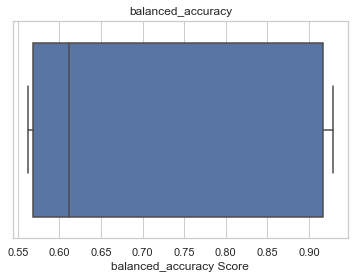

balanced_accuracy all:  [0.5625, 0.56875, 0.9166666666666667, 0.9285714285714286, 0.611111111111111]
balanced_accuracy = 0.72 ± 0.17)


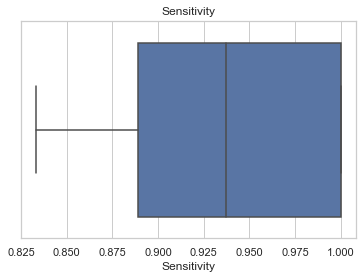

Sensitivity all:  [1.0, 0.9375, 0.8333333333333334, 1.0, 0.8888888888888888]
Sensitivity = 0.93 ± 0.06)


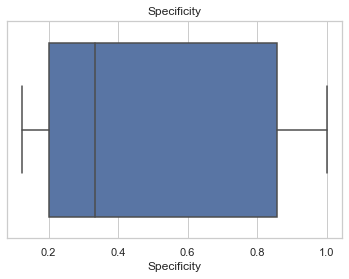

Specificity all:  [0.125, 0.2, 1.0, 0.8571428571428571, 0.3333333333333333]
Specificity = 0.50 ± 0.36)
One Combined Confusion Matrix
conf_matrix: 
  [[50  5]
 [21 12]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.70      0.91      0.79        55
         1.0       0.71      0.36      0.48        33

    accuracy                           0.70        88
   macro avg       0.71      0.64      0.64        88
weighted avg       0.70      0.70      0.68        88

matthews_corrcoef
0.3344361761588868
balanced_accuracy_score
0.6363636363636364
Sensitivity
0.9090909090909091
Specificity
0.36363636363636365
AUC-ROC for the combined results: 


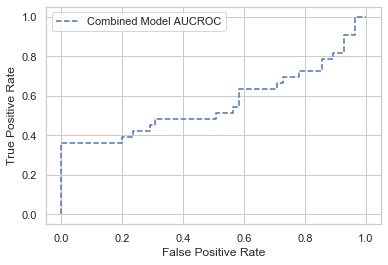

Combined Model AUC ROC:  0.5652892561983471
Start
0.0    67
1.0    39
Name: BSK_LPS_SRB_down, dtype: int64


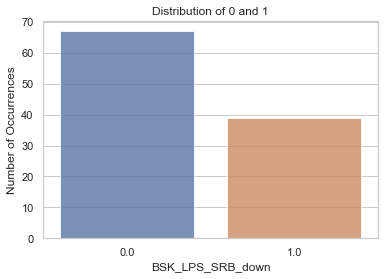

Total Compounds in Assay:  106
pca explained variance by first two components:  0.7210227204267772


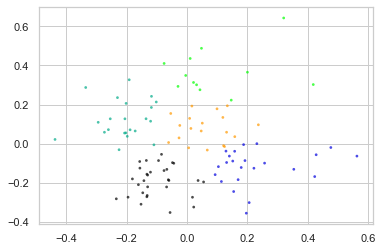

Start
0    30
1    23
2    22
4    19
3    12
Name: Cluster_PC1_PC2, dtype: int64


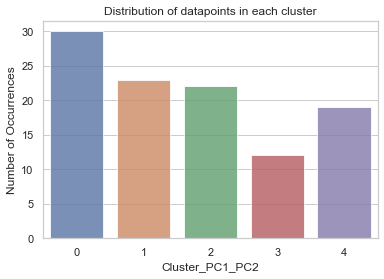

Total Selected CP features:  101
Total Selected train:  76
Total Selected test:  30
Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 120 tasks      | elapsed:   17.1s
[Parallel(n_jobs=40)]: Done 370 tasks      | elapsed:   50.2s
[Parallel(n_jobs=40)]: Done 720 tasks      | elapsed:  1.6min
[Parallel(n_jobs=40)]: Done 1170 tasks      | elapsed:  2.4min
[Parallel(n_jobs=40)]: Done 1720 tasks      | elapsed:  3.5min
[Parallel(n_jobs=40)]: Done 2370 tasks      | elapsed:  4.7min
[Parallel(n_jobs=40)]: Done 3120 tasks      | elapsed:  6.3min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.9min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=15, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[17  8]
 [ 3  2]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.85      0.68      0.76        25
         1.0       0.20      0.40      0.27         5

    accuracy                           0.63        30
   macro avg       0.53      0.54      0.51        30
weighted avg       0.74      0.63      0.67        30

Total Selected CP features:  92
Total S

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 120 tasks      | elapsed:   17.7s
[Parallel(n_jobs=40)]: Done 370 tasks      | elapsed:   50.7s
[Parallel(n_jobs=40)]: Done 720 tasks      | elapsed:  1.6min
[Parallel(n_jobs=40)]: Done 1170 tasks      | elapsed:  2.5min
[Parallel(n_jobs=40)]: Done 1720 tasks      | elapsed:  3.6min
[Parallel(n_jobs=40)]: Done 2370 tasks      | elapsed:  4.8min
[Parallel(n_jobs=40)]: Done 3120 tasks      | elapsed:  6.3min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.9min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[11  7]
 [ 2  3]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.85      0.61      0.71        18
         1.0       0.30      0.60      0.40         5

    accuracy                           0.61        23
   macro avg       0.57      0.61      0.55        23
weighted avg       0.73      0.61      0.64        23

Total Selected CP features:  244
Total 

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 120 tasks      | elapsed:   17.2s
[Parallel(n_jobs=40)]: Done 370 tasks      | elapsed:   48.6s
[Parallel(n_jobs=40)]: Done 720 tasks      | elapsed:  1.6min
[Parallel(n_jobs=40)]: Done 1170 tasks      | elapsed:  2.4min
[Parallel(n_jobs=40)]: Done 1720 tasks      | elapsed:  3.5min
[Parallel(n_jobs=40)]: Done 2370 tasks      | elapsed:  4.7min
[Parallel(n_jobs=40)]: Done 3120 tasks      | elapsed:  6.3min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  8.0min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=700,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[ 6  0]
 [12  4]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.33      1.00      0.50         6
         1.0       1.00      0.25      0.40        16

    accuracy                           0.45        22
   macro avg       0.67      0.62      0.45        22
weighted avg       0.82      0.45      0.43        22

Total Selected CP features:  80
Total Se

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 120 tasks      | elapsed:   17.4s
[Parallel(n_jobs=40)]: Done 370 tasks      | elapsed:   50.4s
[Parallel(n_jobs=40)]: Done 720 tasks      | elapsed:  1.6min
[Parallel(n_jobs=40)]: Done 1170 tasks      | elapsed:  2.3min
[Parallel(n_jobs=40)]: Done 1720 tasks      | elapsed:  3.4min
[Parallel(n_jobs=40)]: Done 2370 tasks      | elapsed:  4.5min
[Parallel(n_jobs=40)]: Done 3120 tasks      | elapsed:  6.0min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.6min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[13  0]
 [ 3  3]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.81      1.00      0.90        13
         1.0       1.00      0.50      0.67         6

    accuracy                           0.84        19
   macro avg       0.91      0.75      0.78        19
weighted avg       0.87      0.84      0.82        19

Total Selected CP features:  113
Total Sele

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 120 tasks      | elapsed:   18.9s
[Parallel(n_jobs=40)]: Done 370 tasks      | elapsed:   48.4s
[Parallel(n_jobs=40)]: Done 720 tasks      | elapsed:  1.6min
[Parallel(n_jobs=40)]: Done 1170 tasks      | elapsed:  2.4min
[Parallel(n_jobs=40)]: Done 1720 tasks      | elapsed:  3.4min
[Parallel(n_jobs=40)]: Done 2370 tasks      | elapsed:  4.7min
[Parallel(n_jobs=40)]: Done 3120 tasks      | elapsed:  6.2min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.9min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[4 1]
 [5 2]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.44      0.80      0.57         5
         1.0       0.67      0.29      0.40         7

    accuracy                           0.50        12
   macro avg       0.56      0.54      0.49        12
weighted avg       0.57      0.50      0.47        12



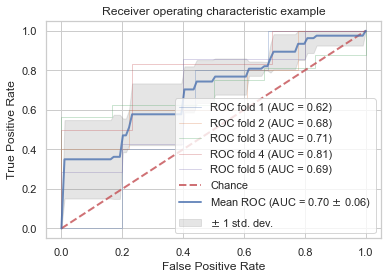

Mean of Each fold


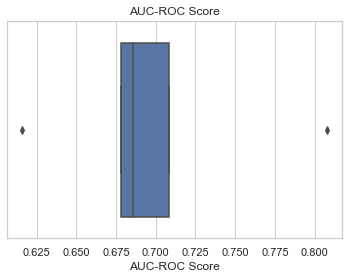

AUC-ROC all:  [0.616, 0.6777777777777778, 0.7083333333333335, 0.8076923076923077, 0.6857142857142857]
AUC-ROC = 0.70 ± 0.06)


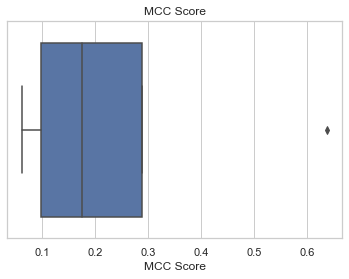

Matthews_corrcoef all:  [0.06324555320336758, 0.17565506213798923, 0.28867513459481287, 0.6373774391990981, 0.09759000729485331]
Matthews_corrcoef = 0.253 ± 0.207)


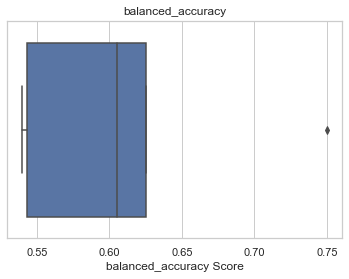

balanced_accuracy all:  [0.54, 0.6055555555555556, 0.625, 0.75, 0.5428571428571429]
balanced_accuracy = 0.61 ± 0.08)


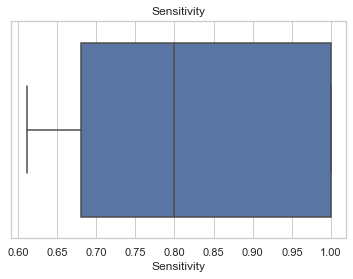

Sensitivity all:  [0.68, 0.6111111111111112, 1.0, 1.0, 0.8]
Sensitivity = 0.82 ± 0.16)


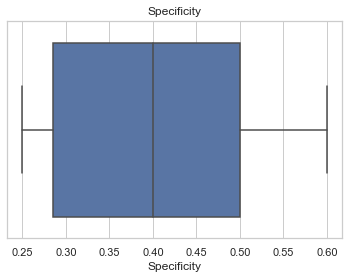

Specificity all:  [0.4, 0.6, 0.25, 0.5, 0.2857142857142857]
Specificity = 0.41 ± 0.13)
One Combined Confusion Matrix
conf_matrix: 
  [[51 16]
 [25 14]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.67      0.76      0.71        67
         1.0       0.47      0.36      0.41        39

    accuracy                           0.61       106
   macro avg       0.57      0.56      0.56       106
weighted avg       0.60      0.61      0.60       106

matthews_corrcoef
0.12864488400359952
balanced_accuracy_score
0.5600841944125526
Sensitivity
0.7611940298507462
Specificity
0.358974358974359
AUC-ROC for the combined results: 


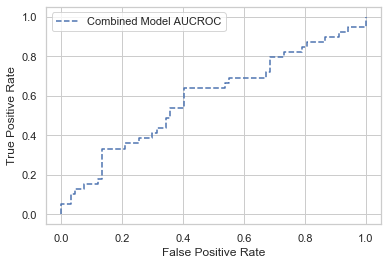

Combined Model AUC ROC:  0.5882127822426331
Start
0.0    70
1.0    36
Name: BSK_CASM3C_Proliferation_down, dtype: int64


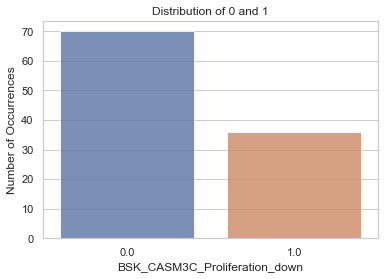

Total Compounds in Assay:  106
pca explained variance by first two components:  0.7210227204267772


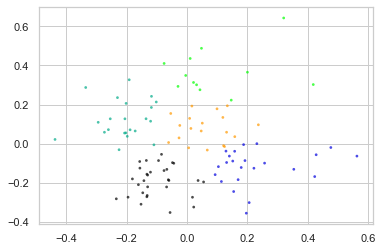

Start
0    30
1    23
2    22
4    19
3    12
Name: Cluster_PC1_PC2, dtype: int64


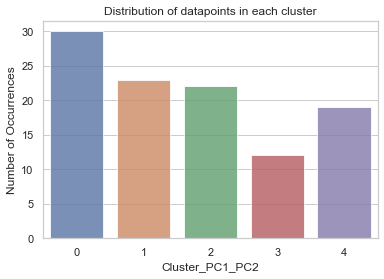

Total Selected CP features:  221
Total Selected train:  76
Total Selected test:  30
Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 120 tasks      | elapsed:   18.1s
[Parallel(n_jobs=40)]: Done 370 tasks      | elapsed:   50.2s
[Parallel(n_jobs=40)]: Done 720 tasks      | elapsed:  1.6min
[Parallel(n_jobs=40)]: Done 1170 tasks      | elapsed:  2.4min
[Parallel(n_jobs=40)]: Done 1720 tasks      | elapsed:  3.5min
[Parallel(n_jobs=40)]: Done 2370 tasks      | elapsed:  4.7min
[Parallel(n_jobs=40)]: Done 3120 tasks      | elapsed:  6.3min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.9min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[20  6]
 [ 2  2]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.91      0.77      0.83        26
         1.0       0.25      0.50      0.33         4

    accuracy                           0.73        30
   macro avg       0.58      0.63      0.58        30
weighted avg       0.82      0.73      0.77        30

Total Selected CP features:  125
Total Selecte

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 120 tasks      | elapsed:   17.3s
[Parallel(n_jobs=40)]: Done 370 tasks      | elapsed:   47.6s
[Parallel(n_jobs=40)]: Done 720 tasks      | elapsed:  1.4min
[Parallel(n_jobs=40)]: Done 1170 tasks      | elapsed:  2.3min
[Parallel(n_jobs=40)]: Done 1720 tasks      | elapsed:  3.5min
[Parallel(n_jobs=40)]: Done 2370 tasks      | elapsed:  4.7min
[Parallel(n_jobs=40)]: Done 3120 tasks      | elapsed:  6.3min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.9min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[15  4]
 [ 1  3]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.94      0.79      0.86        19
         1.0       0.43      0.75      0.55         4

    accuracy                           0.78        23
   macro avg       0.68      0.77      0.70        23
weighted avg       0.85      0.78      0.80        23

Total Selected CP features:  359
Total Selecte

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 120 tasks      | elapsed:   17.4s
[Parallel(n_jobs=40)]: Done 370 tasks      | elapsed:   43.6s
[Parallel(n_jobs=40)]: Done 720 tasks      | elapsed:  1.4min
[Parallel(n_jobs=40)]: Done 1170 tasks      | elapsed:  2.3min
[Parallel(n_jobs=40)]: Done 1720 tasks      | elapsed:  3.6min
[Parallel(n_jobs=40)]: Done 2370 tasks      | elapsed:  4.9min
[Parallel(n_jobs=40)]: Done 3120 tasks      | elapsed:  6.5min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  8.1min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[ 8  0]
 [12  2]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.40      1.00      0.57         8
         1.0       1.00      0.14      0.25        14

    accuracy                           0.45        22
   macro avg       0.70      0.57      0.41        22
weighted avg       0.78      0.45      0.37        22

Total Selected CP features:  149
Total Selecte

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 120 tasks      | elapsed:   17.1s
[Parallel(n_jobs=40)]: Done 370 tasks      | elapsed:   42.8s
[Parallel(n_jobs=40)]: Done 720 tasks      | elapsed:  1.3min
[Parallel(n_jobs=40)]: Done 1170 tasks      | elapsed:  2.2min
[Parallel(n_jobs=40)]: Done 1720 tasks      | elapsed:  3.4min
[Parallel(n_jobs=40)]: Done 2370 tasks      | elapsed:  4.5min
[Parallel(n_jobs=40)]: Done 3120 tasks      | elapsed:  6.1min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.6min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[12  1]
 [ 3  3]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.80      0.92      0.86        13
         1.0       0.75      0.50      0.60         6

    accuracy                           0.79        19
   macro avg       0.78      0.71      0.73        19
weighted avg       0.78      0.79      0.78        19

Total Selected CP features:  79
Total Selected

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 120 tasks      | elapsed:   17.2s
[Parallel(n_jobs=40)]: Done 370 tasks      | elapsed:   44.8s
[Parallel(n_jobs=40)]: Done 720 tasks      | elapsed:  1.4min
[Parallel(n_jobs=40)]: Done 1170 tasks      | elapsed:  2.4min
[Parallel(n_jobs=40)]: Done 1720 tasks      | elapsed:  3.6min
[Parallel(n_jobs=40)]: Done 2370 tasks      | elapsed:  4.6min
[Parallel(n_jobs=40)]: Done 3120 tasks      | elapsed:  6.1min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.8min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[4 0]
 [4 4]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.50      1.00      0.67         4
         1.0       1.00      0.50      0.67         8

    accuracy                           0.67        12
   macro avg       0.75      0.75      0.67        12
weighted avg       0.83      0.67      0.67        12



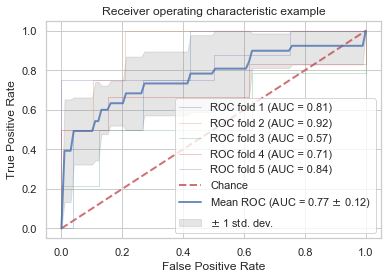

Mean of Each fold


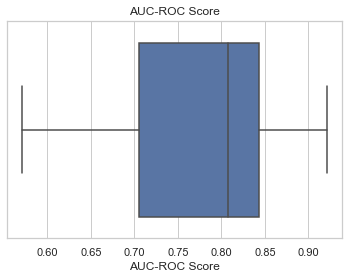

AUC-ROC all:  [0.8076923076923077, 0.9210526315789473, 0.5714285714285715, 0.7051282051282051, 0.84375]
AUC-ROC = 0.77 ± 0.12)


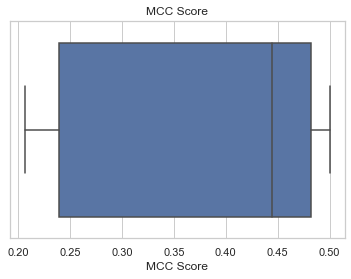

Matthews_corrcoef all:  [0.2069593385961789, 0.4443938593811115, 0.23904572186687872, 0.48238191061886604, 0.5]
Matthews_corrcoef = 0.375 ± 0.125)


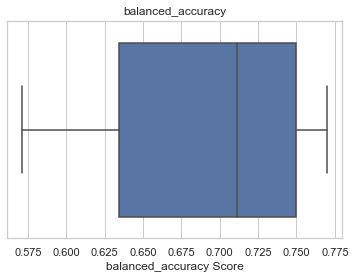

balanced_accuracy all:  [0.6346153846153846, 0.7697368421052632, 0.5714285714285714, 0.7115384615384616, 0.75]
balanced_accuracy = 0.69 ± 0.07)


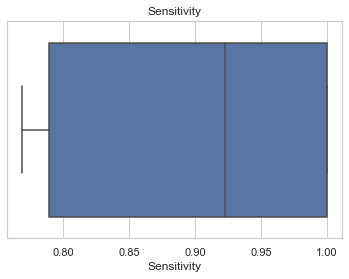

Sensitivity all:  [0.7692307692307693, 0.7894736842105263, 1.0, 0.9230769230769231, 1.0]
Sensitivity = 0.90 ± 0.10)


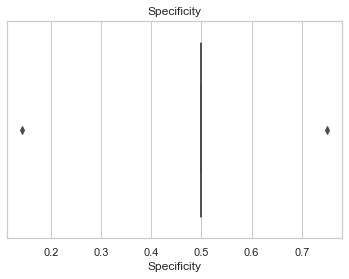

Specificity all:  [0.5, 0.75, 0.14285714285714285, 0.5, 0.5]
Specificity = 0.48 ± 0.19)
One Combined Confusion Matrix
conf_matrix: 
  [[59 11]
 [22 14]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.73      0.84      0.78        70
         1.0       0.56      0.39      0.46        36

    accuracy                           0.69       106
   macro avg       0.64      0.62      0.62       106
weighted avg       0.67      0.69      0.67       106

matthews_corrcoef
0.25852352142640217
balanced_accuracy_score
0.6158730158730159
Sensitivity
0.8428571428571429
Specificity
0.3888888888888889
AUC-ROC for the combined results: 


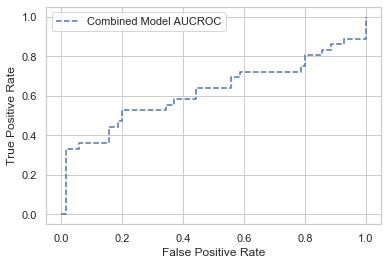

Combined Model AUC ROC:  0.621031746031746
Start
0.0    70
1.0    36
Name: BSK_SAg_SRB_down, dtype: int64


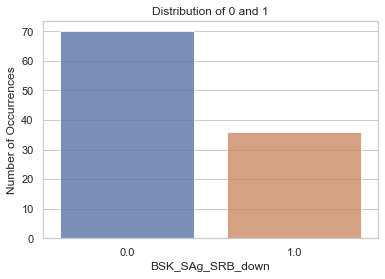

Total Compounds in Assay:  106
pca explained variance by first two components:  0.7210227204267772


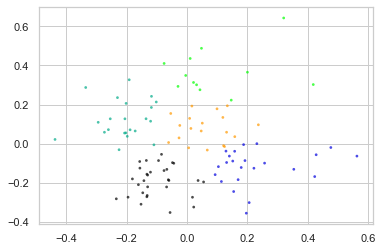

Start
0    30
1    23
2    22
4    19
3    12
Name: Cluster_PC1_PC2, dtype: int64


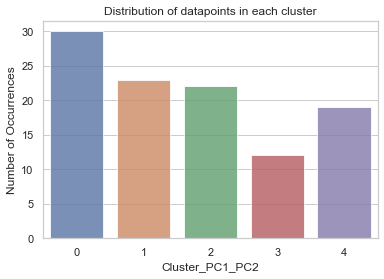

Total Selected CP features:  105
Total Selected train:  76
Total Selected test:  30
Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 120 tasks      | elapsed:   14.1s
[Parallel(n_jobs=40)]: Done 370 tasks      | elapsed:   39.6s
[Parallel(n_jobs=40)]: Done 720 tasks      | elapsed:  1.4min
[Parallel(n_jobs=40)]: Done 1170 tasks      | elapsed:  2.4min
[Parallel(n_jobs=40)]: Done 1720 tasks      | elapsed:  3.5min
[Parallel(n_jobs=40)]: Done 2370 tasks      | elapsed:  4.7min
[Parallel(n_jobs=40)]: Done 3120 tasks      | elapsed:  6.2min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.9min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=700,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[20  6]
 [ 3  1]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.87      0.77      0.82        26
         1.0       0.14      0.25      0.18         4

    accuracy                           0.70        30
   macro avg       0.51      0.51      0.50        30
weighted avg       0.77      0.70      0.73        30

Total Selected CP features:  92
Total Selected

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 120 tasks      | elapsed:   13.8s
[Parallel(n_jobs=40)]: Done 370 tasks      | elapsed:   39.6s
[Parallel(n_jobs=40)]: Done 720 tasks      | elapsed:  1.4min
[Parallel(n_jobs=40)]: Done 1170 tasks      | elapsed:  2.2min
[Parallel(n_jobs=40)]: Done 1720 tasks      | elapsed:  3.3min
[Parallel(n_jobs=40)]: Done 2370 tasks      | elapsed:  4.5min
[Parallel(n_jobs=40)]: Done 3120 tasks      | elapsed:  6.1min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.8min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[14  5]
 [ 3  1]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.82      0.74      0.78        19
         1.0       0.17      0.25      0.20         4

    accuracy                           0.65        23
   macro avg       0.50      0.49      0.49        23
weighted avg       0.71      0.65      0.68        23

Total Selected CP features:  262
Total Select

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 120 tasks      | elapsed:   15.1s
[Parallel(n_jobs=40)]: Done 370 tasks      | elapsed:   43.3s
[Parallel(n_jobs=40)]: Done 720 tasks      | elapsed:  1.4min
[Parallel(n_jobs=40)]: Done 1170 tasks      | elapsed:  2.4min
[Parallel(n_jobs=40)]: Done 1720 tasks      | elapsed:  3.4min
[Parallel(n_jobs=40)]: Done 2370 tasks      | elapsed:  4.7min
[Parallel(n_jobs=40)]: Done 3120 tasks      | elapsed:  6.4min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  8.1min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[ 6  0]
 [14  2]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.30      1.00      0.46         6
         1.0       1.00      0.12      0.22        16

    accuracy                           0.36        22
   macro avg       0.65      0.56      0.34        22
weighted avg       0.81      0.36      0.29        22

Total Selected CP features:  80
Total Selecte

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 120 tasks      | elapsed:   12.5s
[Parallel(n_jobs=40)]: Done 370 tasks      | elapsed:   38.4s
[Parallel(n_jobs=40)]: Done 720 tasks      | elapsed:  1.3min
[Parallel(n_jobs=40)]: Done 1170 tasks      | elapsed:  2.2min
[Parallel(n_jobs=40)]: Done 1720 tasks      | elapsed:  3.0min
[Parallel(n_jobs=40)]: Done 2370 tasks      | elapsed:  4.0min
[Parallel(n_jobs=40)]: Done 3120 tasks      | elapsed:  5.3min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  6.7min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[12  2]
 [ 3  2]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.80      0.86      0.83        14
         1.0       0.50      0.40      0.44         5

    accuracy                           0.74        19
   macro avg       0.65      0.63      0.64        19
weighted avg       0.72      0.74      0.73        19

Total Selected CP features:  68
Total

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 120 tasks      | elapsed:   13.5s
[Parallel(n_jobs=40)]: Done 370 tasks      | elapsed:   34.4s
[Parallel(n_jobs=40)]: Done 720 tasks      | elapsed:  1.0min
[Parallel(n_jobs=40)]: Done 1170 tasks      | elapsed:  1.9min
[Parallel(n_jobs=40)]: Done 1720 tasks      | elapsed:  3.1min
[Parallel(n_jobs=40)]: Done 2370 tasks      | elapsed:  4.3min
[Parallel(n_jobs=40)]: Done 3120 tasks      | elapsed:  6.0min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.6min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[3 2]
 [3 4]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.50      0.60      0.55         5
         1.0       0.67      0.57      0.62         7

    accuracy                           0.58        12
   macro avg       0.58      0.59      0.58        12
weighted avg       0.60      0.58      0.59        12



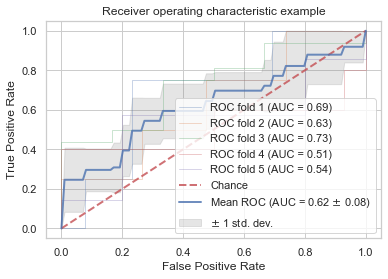

Mean of Each fold


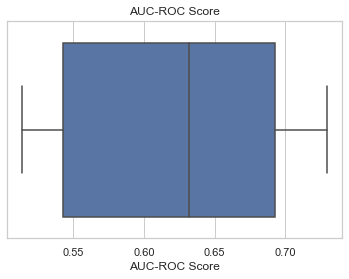

AUC-ROC all:  [0.6923076923076923, 0.631578947368421, 0.7291666666666667, 0.5142857142857142, 0.5428571428571429]
AUC-ROC = 0.62 ± 0.08)


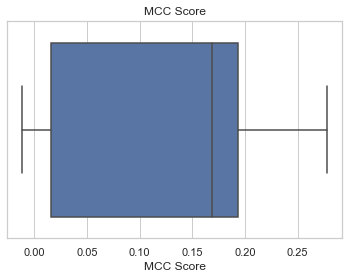

Matthews_corrcoef all:  [0.015456116693379658, -0.011357771260606365, 0.19364916731037085, 0.27774602993176545, 0.1690308509457033]
Matthews_corrcoef = 0.129 ± 0.110)


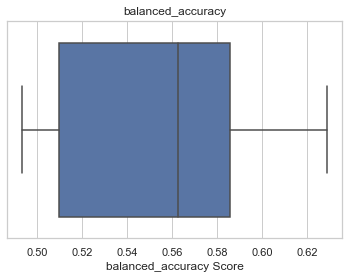

balanced_accuracy all:  [0.5096153846153846, 0.4934210526315789, 0.5625, 0.6285714285714286, 0.5857142857142856]
balanced_accuracy = 0.56 ± 0.05)


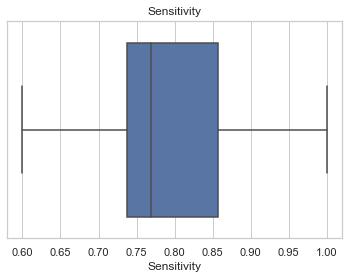

Sensitivity all:  [0.7692307692307693, 0.7368421052631579, 1.0, 0.8571428571428571, 0.6]
Sensitivity = 0.79 ± 0.13)


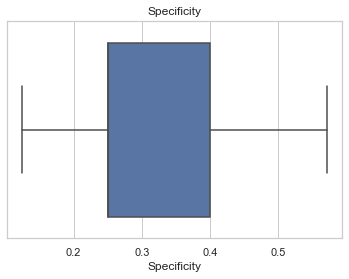

Specificity all:  [0.25, 0.25, 0.125, 0.4, 0.5714285714285714]
Specificity = 0.32 ± 0.15)
One Combined Confusion Matrix
conf_matrix: 
  [[55 15]
 [26 10]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.68      0.79      0.73        70
         1.0       0.40      0.28      0.33        36

    accuracy                           0.61       106
   macro avg       0.54      0.53      0.53       106
weighted avg       0.58      0.61      0.59       106

matthews_corrcoef
0.07082836203463073
balanced_accuracy_score
0.5317460317460317
Sensitivity
0.7857142857142857
Specificity
0.2777777777777778
AUC-ROC for the combined results: 


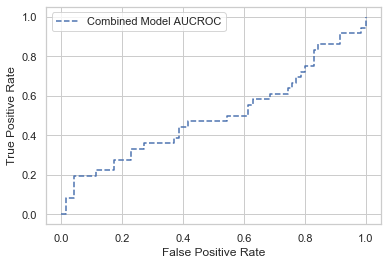

Combined Model AUC ROC:  0.4988095238095238
Start
0.0    72
1.0    34
Name: BSK_4H_SRB_down, dtype: int64


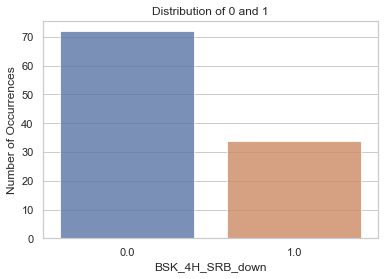

Total Compounds in Assay:  106
pca explained variance by first two components:  0.7210227204267772


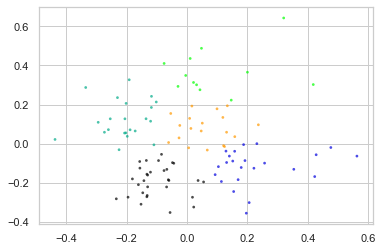

Start
0    30
1    23
2    22
4    19
3    12
Name: Cluster_PC1_PC2, dtype: int64


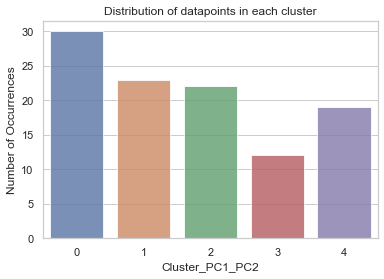

Total Selected CP features:  173
Total Selected train:  76
Total Selected test:  30
Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 120 tasks      | elapsed:   12.1s
[Parallel(n_jobs=40)]: Done 370 tasks      | elapsed:   36.8s
[Parallel(n_jobs=40)]: Done 720 tasks      | elapsed:  1.4min
[Parallel(n_jobs=40)]: Done 1170 tasks      | elapsed:  2.3min
[Parallel(n_jobs=40)]: Done 1720 tasks      | elapsed:  3.4min
[Parallel(n_jobs=40)]: Done 2370 tasks      | elapsed:  4.7min
[Parallel(n_jobs=40)]: Done 3120 tasks      | elapsed:  6.3min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  8.0min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[19  6]
 [ 2  3]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.90      0.76      0.83        25
         1.0       0.33      0.60      0.43         5

    accuracy                           0.73        30
   macro avg       0.62      0.68      0.63        30
weighted avg       0.81      0.73      0.76        30

Total Selected CP features:  225
Total Selecte

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 120 tasks      | elapsed:   14.3s
[Parallel(n_jobs=40)]: Done 370 tasks      | elapsed:   41.6s
[Parallel(n_jobs=40)]: Done 720 tasks      | elapsed:  1.4min
[Parallel(n_jobs=40)]: Done 1170 tasks      | elapsed:  2.4min
[Parallel(n_jobs=40)]: Done 1720 tasks      | elapsed:  3.5min
[Parallel(n_jobs=40)]: Done 2370 tasks      | elapsed:  4.8min
[Parallel(n_jobs=40)]: Done 3120 tasks      | elapsed:  6.4min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  8.0min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[15  4]
 [ 1  3]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.94      0.79      0.86        19
         1.0       0.43      0.75      0.55         4

    accuracy                           0.78        23
   macro avg       0.68      0.77      0.70        23
weighted avg       0.85      0.78      0.80        23

Total Selected CP features:  465
Total S

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 120 tasks      | elapsed:   14.3s
[Parallel(n_jobs=40)]: Done 370 tasks      | elapsed:   40.2s
[Parallel(n_jobs=40)]: Done 720 tasks      | elapsed:  1.4min
[Parallel(n_jobs=40)]: Done 1170 tasks      | elapsed:  2.4min
[Parallel(n_jobs=40)]: Done 1720 tasks      | elapsed:  3.5min
[Parallel(n_jobs=40)]: Done 2370 tasks      | elapsed:  4.8min
[Parallel(n_jobs=40)]: Done 3120 tasks      | elapsed:  6.4min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  8.1min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[ 8  0]
 [12  2]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.40      1.00      0.57         8
         1.0       1.00      0.14      0.25        14

    accuracy                           0.45        22
   macro avg       0.70      0.57      0.41        22
weighted avg       0.78      0.45      0.37        22

Total Selected CP features:  251
Total 

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 120 tasks      | elapsed:   14.3s
[Parallel(n_jobs=40)]: Done 370 tasks      | elapsed:   40.6s
[Parallel(n_jobs=40)]: Done 720 tasks      | elapsed:  1.4min
[Parallel(n_jobs=40)]: Done 1170 tasks      | elapsed:  2.3min
[Parallel(n_jobs=40)]: Done 1720 tasks      | elapsed:  3.4min
[Parallel(n_jobs=40)]: Done 2370 tasks      | elapsed:  4.6min
[Parallel(n_jobs=40)]: Done 3120 tasks      | elapsed:  6.0min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.7min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[13  0]
 [ 4  2]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.76      1.00      0.87        13
         1.0       1.00      0.33      0.50         6

    accuracy                           0.79        19
   macro avg       0.88      0.67      0.68        19
weighted avg       0.84      0.79      0.75        19

Total Selected CP features:  181
Total Sel

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 120 tasks      | elapsed:   14.3s
[Parallel(n_jobs=40)]: Done 370 tasks      | elapsed:   41.0s
[Parallel(n_jobs=40)]: Done 720 tasks      | elapsed:  1.4min
[Parallel(n_jobs=40)]: Done 1170 tasks      | elapsed:  2.4min
[Parallel(n_jobs=40)]: Done 1720 tasks      | elapsed:  3.5min
[Parallel(n_jobs=40)]: Done 2370 tasks      | elapsed:  4.7min
[Parallel(n_jobs=40)]: Done 3120 tasks      | elapsed:  6.3min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  8.0min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[5 2]
 [1 4]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.83      0.71      0.77         7
         1.0       0.67      0.80      0.73         5

    accuracy                           0.75        12
   macro avg       0.75      0.76      0.75        12
weighted avg       0.76      0.75      0.75        12



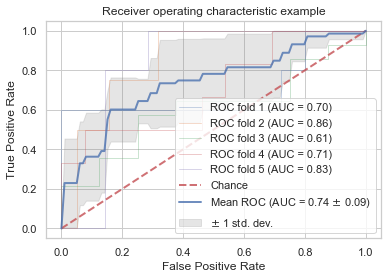

Mean of Each fold


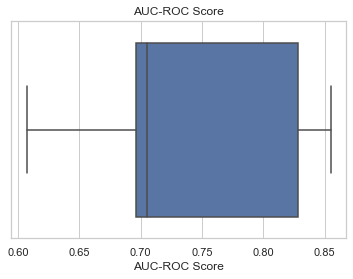

AUC-ROC all:  [0.696, 0.8552631578947368, 0.6071428571428572, 0.7051282051282052, 0.8285714285714286]
AUC-ROC = 0.74 ± 0.09)


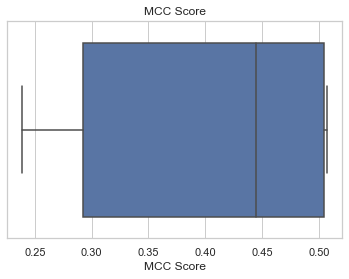

Matthews_corrcoef all:  [0.2927700218845599, 0.4443938593811115, 0.23904572186687872, 0.5048781642974013, 0.50709255283711]
Matthews_corrcoef = 0.398 ± 0.111)


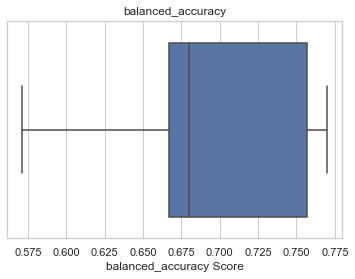

balanced_accuracy all:  [0.6799999999999999, 0.7697368421052632, 0.5714285714285714, 0.6666666666666666, 0.7571428571428571]
balanced_accuracy = 0.69 ± 0.07)


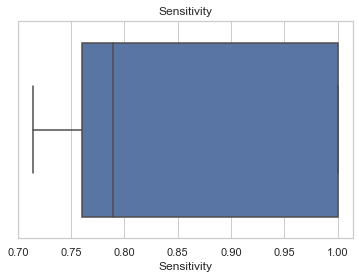

Sensitivity all:  [0.76, 0.7894736842105263, 1.0, 1.0, 0.7142857142857143]
Sensitivity = 0.85 ± 0.12)


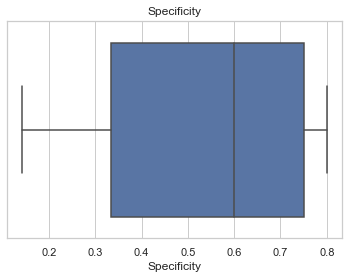

Specificity all:  [0.6, 0.75, 0.14285714285714285, 0.3333333333333333, 0.8]
Specificity = 0.53 ± 0.25)
One Combined Confusion Matrix
conf_matrix: 
  [[60 12]
 [20 14]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.75      0.83      0.79        72
         1.0       0.54      0.41      0.47        34

    accuracy                           0.70       106
   macro avg       0.64      0.62      0.63       106
weighted avg       0.68      0.70      0.69       106

matthews_corrcoef
0.26589726863219815
balanced_accuracy_score
0.6225490196078431
Sensitivity
0.8333333333333334
Specificity
0.4117647058823529
AUC-ROC for the combined results: 


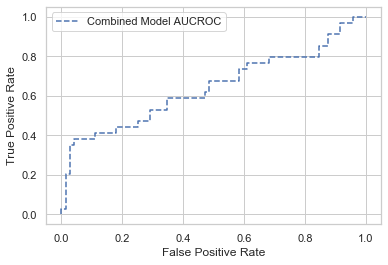

Combined Model AUC ROC:  0.6405228758169935
Start
0.0    90
1.0    34
Name: ACEA_T47D_80hr_Negative, dtype: int64


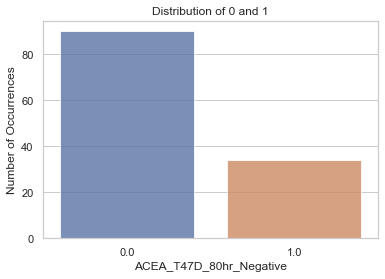

Total Compounds in Assay:  124
pca explained variance by first two components:  0.7273896354684481


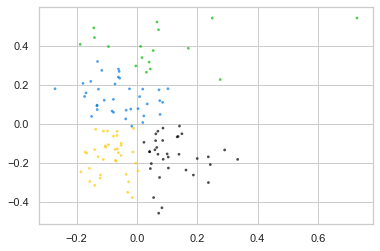

Start
1    37
3    36
0    34
2    17
Name: Cluster_PC1_PC2, dtype: int64


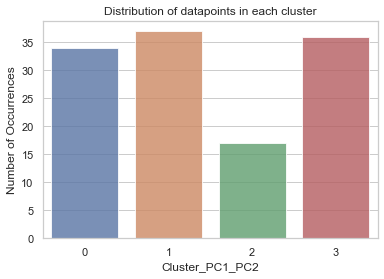

Total Selected CP features:  271
Total Selected train:  87
Total Selected test:  37
Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 120 tasks      | elapsed:   14.7s
[Parallel(n_jobs=40)]: Done 370 tasks      | elapsed:   45.9s
[Parallel(n_jobs=40)]: Done 720 tasks      | elapsed:  1.5min
[Parallel(n_jobs=40)]: Done 1170 tasks      | elapsed:  2.4min
[Parallel(n_jobs=40)]: Done 1720 tasks      | elapsed:  3.4min
[Parallel(n_jobs=40)]: Done 2370 tasks      | elapsed:  4.8min
[Parallel(n_jobs=40)]: Done 3120 tasks      | elapsed:  6.4min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  8.1min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[19  1]
 [12  5]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.61      0.95      0.75        20
         1.0       0.83      0.29      0.43        17

    accuracy                           0.65        37
   macro avg       0.72      0.62      0.59        37
weighted avg       0.71      0.65      0.60        37

Total Selected CP features:  245
Total Selecte

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 120 tasks      | elapsed:   14.8s
[Parallel(n_jobs=40)]: Done 370 tasks      | elapsed:   46.9s
[Parallel(n_jobs=40)]: Done 720 tasks      | elapsed:  1.5min
[Parallel(n_jobs=40)]: Done 1170 tasks      | elapsed:  2.4min
[Parallel(n_jobs=40)]: Done 1720 tasks      | elapsed:  3.5min
[Parallel(n_jobs=40)]: Done 2370 tasks      | elapsed:  4.8min
[Parallel(n_jobs=40)]: Done 3120 tasks      | elapsed:  6.4min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  8.1min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[27  2]
 [ 6  1]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.82      0.93      0.87        29
         1.0       0.33      0.14      0.20         7

    accuracy                           0.78        36
   macro avg       0.58      0.54      0.54        36
weighted avg       0.72      0.78      0.74        36

Total Selected CP features:  215
Tot

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 120 tasks      | elapsed:   16.8s
[Parallel(n_jobs=40)]: Done 370 tasks      | elapsed:   48.5s
[Parallel(n_jobs=40)]: Done 720 tasks      | elapsed:  1.5min
[Parallel(n_jobs=40)]: Done 1170 tasks      | elapsed:  2.5min
[Parallel(n_jobs=40)]: Done 1720 tasks      | elapsed:  3.5min
[Parallel(n_jobs=40)]: Done 2370 tasks      | elapsed:  4.9min
[Parallel(n_jobs=40)]: Done 3120 tasks      | elapsed:  6.5min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  8.2min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[27  5]
 [ 1  1]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.96      0.84      0.90        32
         1.0       0.17      0.50      0.25         2

    accuracy                           0.82        34
   macro avg       0.57      0.67      0.57        34
weighted avg       0.92      0.82      0.86        34

Total Selected CP features:  66
Total Selecte

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 120 tasks      | elapsed:   14.2s
[Parallel(n_jobs=40)]: Done 370 tasks      | elapsed:   39.8s
[Parallel(n_jobs=40)]: Done 720 tasks      | elapsed:  1.4min
[Parallel(n_jobs=40)]: Done 1170 tasks      | elapsed:  2.3min
[Parallel(n_jobs=40)]: Done 1720 tasks      | elapsed:  3.4min
[Parallel(n_jobs=40)]: Done 2370 tasks      | elapsed:  4.6min
[Parallel(n_jobs=40)]: Done 3120 tasks      | elapsed:  6.3min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.9min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[9 0]
 [5 3]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.64      1.00      0.78         9
         1.0       1.00      0.38      0.55         8

    accuracy                           0.71        17
   macro avg       0.82      0.69      0.66        17
weighted avg       0.81      0.71      0.67        17



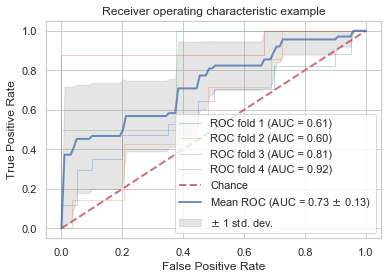

Mean of Each fold


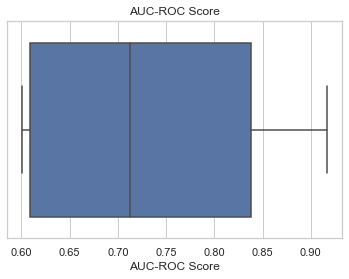

AUC-ROC all:  [0.611764705882353, 0.6009852216748768, 0.8125, 0.9166666666666666]
AUC-ROC = 0.74 ± 0.13)


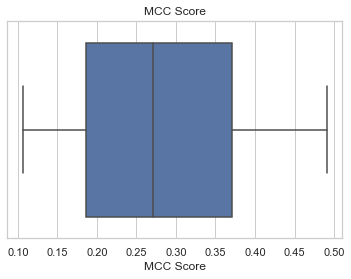

Matthews_corrcoef all:  [0.33005184266843574, 0.10580973892262123, 0.21216710619787638, 0.49099025303098287]
Matthews_corrcoef = 0.285 ± 0.143)


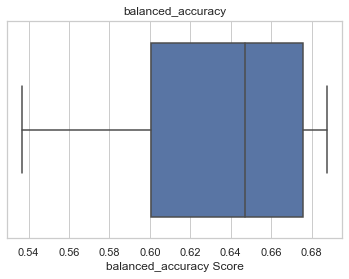

balanced_accuracy all:  [0.6220588235294118, 0.5369458128078818, 0.671875, 0.6875]
balanced_accuracy = 0.63 ± 0.06)


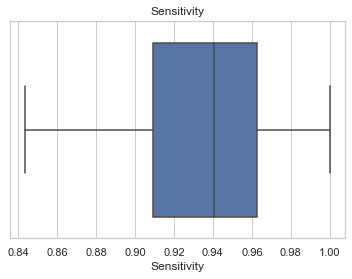

Sensitivity all:  [0.95, 0.9310344827586207, 0.84375, 1.0]
Sensitivity = 0.93 ± 0.06)


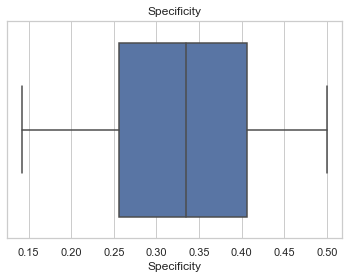

Specificity all:  [0.29411764705882354, 0.14285714285714285, 0.5, 0.375]
Specificity = 0.33 ± 0.13)
One Combined Confusion Matrix
conf_matrix: 
  [[82  8]
 [24 10]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.77      0.91      0.84        90
         1.0       0.56      0.29      0.38        34

    accuracy                           0.74       124
   macro avg       0.66      0.60      0.61       124
weighted avg       0.71      0.74      0.71       124

matthews_corrcoef
0.2599020740948895
balanced_accuracy_score
0.6026143790849673
Sensitivity
0.9111111111111111
Specificity
0.29411764705882354
AUC-ROC for the combined results: 


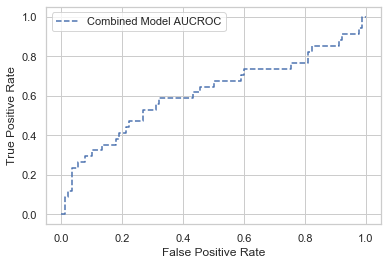

Combined Model AUC ROC:  0.6150326797385621


In [43]:
list_of_lists = []

for col in tox_list:
    method = "CP_KS_0.02"
    
    print("Start")
    toxcast_counts=our_data[col].value_counts()
    print(our_data[col].value_counts())
    pyplot.figure()
    sns.barplot(toxcast_counts.index, toxcast_counts.values, alpha=0.8)
    pyplot.title('Distribution of 0 and 1')
    pyplot.ylabel('Number of Occurrences', fontsize=12)
    pyplot.xlabel(col, fontsize=12)
    pyplot.show()
    
    if col=='ACEA_T47D_80hr_Negative':
        n_cluster=4
    else:
        n_cluster=5
        
    target=col

    df_temp=pd.merge(cp, toxcast[[target, 'smiles_r']], left_on = 'smiles_r', right_on = 'smiles_r', how = 'inner')
    df_temp=df_temp.dropna(subset=[target])
    df_temp = df_temp.loc[:,df_temp.apply(pd.Series.nunique) != 1]
    df_temp=df_temp.drop('Unnamed: 0', axis = 1)
    
    data=df_temp
    data=data.drop('smiles_r', axis = 1)
    
    X, y = data.loc[:, data.columns != target], data[target]
    
    X=X.values
    y=y.values
    
    print("Total Compounds in Assay: ", len(X))
    
    #PCA to groups
    
    df_temp['MolWt']=df_temp['smiles_r'].apply(GetExactMolWt)
    df_temp['TPSA']=df_temp['smiles_r'].apply(GetCalcTPSA) #Topological Polar Surface Area
    df_temp['nRotB']=df_temp['smiles_r'].apply(GetNumRotatableBonds) #Number of rotable bonds
    df_temp['HBD']=df_temp['smiles_r'].apply(GetNumHDonors) #Number of H bond donors
    df_temp['HBA']=df_temp['smiles_r'].apply(GetNumHAcceptors) #Number of H bond acceptors
    df_temp['LogP']=df_temp['smiles_r'].apply(GetMolLogP) #LogP

    descriptors = df_temp.loc[:, ['MolWt', 'TPSA', 'nRotB', 'HBD','HBA', 'LogP']].values
    descriptors_std = StandardScaler().fit_transform(descriptors)
    
    pca = PCA()
    descriptors_2d = pca.fit_transform(descriptors_std)
    descriptors_pca= pd.DataFrame(descriptors_2d)
    descriptors_pca.index = df_temp.index
    descriptors_pca.columns = ['PC{}'.format(i+1) for i in descriptors_pca.columns]

    print("pca explained variance by first two components: ", (pca.explained_variance_ratio_[0]+ pca.explained_variance_ratio_[1]))

    # This normalization will be performed just for PC1 and PC2, but can be done for all the components.
    scale1 = 1.0/(max(descriptors_pca['PC1']) - min(descriptors_pca['PC1']))
    scale2 = 1.0/(max(descriptors_pca['PC2']) - min(descriptors_pca['PC2']))

    # And we add the new values to our PCA table
    descriptors_pca['PC1_normalized']=[i*scale1 for i in descriptors_pca['PC1']]
    descriptors_pca['PC2_normalized']=[i*scale2 for i in descriptors_pca['PC2']]

    kmeans = KMeans(n_clusters=n_cluster, random_state=0)
    cluster_labels = kmeans.fit_predict(descriptors_pca[['PC1_normalized','PC2_normalized']])
    
  
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_cluster)
    plt.scatter(descriptors_pca['PC1_normalized'], descriptors_pca['PC2_normalized'], marker='.', s=30, lw=0, alpha=0.7,c=colors, edgecolor='k')
    plt.show()
    
    
    df_temp['Cluster_PC1_PC2'] = pd.Series(kmeans.labels_, index=df_temp.index)
    print("Start")
    cluster_counts=df_temp['Cluster_PC1_PC2'].value_counts()
    print(df_temp['Cluster_PC1_PC2'].value_counts())
    plt.figure()
    sns.barplot(cluster_counts.index, cluster_counts.values, alpha=0.8)
    plt.title('Distribution of datapoints in each cluster')
    plt.ylabel('Number of Occurrences', fontsize=12)
    plt.xlabel('Cluster_PC1_PC2', fontsize=12)
    plt.show()
    
    
    outercv = GroupKFold(n_splits=n_cluster)
    outercv.get_n_splits(X, y, kmeans.labels_)
    
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    fig, ax = plt.subplots()
    
    mat_cof=[]
    ba=[]
    sen=[]
    spe=[]
    combined_y_test=[]
    combined_y_pred=[]
    #combined_y_proba=[[]]
    
    for i, (train_index, test_index) in enumerate(outercv.split(X, y, kmeans.labels_)):
        
        
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        rows_train= np.concatenate((X_train, y_train[:,None]),axis=1)
        new_df_train = pd.DataFrame(rows_train, columns=data.columns)
        
        rows_test= np.concatenate((X_test, y_test[:,None]),axis=1)
        new_df_test = pd.DataFrame(rows_test, columns=data.columns)
        
        arr=[]
        col_list=[]

        for num in new_df_train.columns:
        
            inactives=new_df_train[num][new_df_train[target]==0]
            actives=new_df_train[num][new_df_train[target]==1]
       
            if (ks_2samp(inactives, actives)[1] <= 0.02):
                col_list.append(num)
        
        print("Total Selected CP features: ",  len(col_list))
        

        train_data=new_df_train[col_list]
        test_data=new_df_test[col_list]
    
        X_train, y_train = train_data.loc[:, train_data.columns != target], train_data[target]
    
        X_train=X_train.values
        y_train=y_train.values
        
        X_test, y_test = test_data.loc[:, test_data.columns != target], test_data[target]
    
        X_test=X_test.values
        y_test=y_test.values
        
        print("Total Selected train: ",  len(X_train))
        print("Total Selected test: ",  len(X_test))
        
        inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
               
        param_grid= { 
        'max_depth': [10, 15, 20],
        'max_features': ['auto'],
        'min_samples_leaf': [3, 6, 12, 15],
        'min_samples_split': [6, 9, 12, 15],
        'n_estimators':[100, 200, 300, 700],
        'bootstrap': [False],
        'oob_score': [False],
        'random_state': [0],
        'criterion': ['gini', 'entropy'],
        'n_jobs': [-1],
        'class_weight' : [None, 'balanced']
        }

        # Create a based model
        rf = RandomForestClassifier()
        # Instantiate the grid search model
        grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                                  cv = inner_cv, n_jobs=40, verbose = 1)

        # Fit the grid search to the data
        grid_search.fit(X_train, y_train)
        print("Tuned Mode: ", grid_search.best_estimator_)

        classifier = grid_search.best_estimator_
        
        classifier.fit(X_train, y_train)
       
        y_pred = classifier.predict(X_test)
        y_proba = classifier.predict_proba(X_test)
       
        combined_y_test=np.concatenate((combined_y_test, y_test), axis=None)
        combined_y_pred=np.concatenate((combined_y_pred, y_pred), axis=None)
        
        if i==0:
            combined_y_proba=y_proba
        else:
            combined_y_proba=np.concatenate((combined_y_proba, y_proba), axis=0)
    
    
        conf_matrix = confusion_matrix(y_test, y_pred)
        print("In this fold")
        print("conf_matrix: \n " , conf_matrix)
        print("classification_report: \n",classification_report(y_test, y_pred))
    
        mat_cof.append(matthews_corrcoef(y_test, y_pred))
        ba.append(balanced_accuracy_score(y_test, y_pred))
        
        sen.append(conf_matrix[0,0]/(conf_matrix[0,0]+conf_matrix[0,1]))
        spe.append(conf_matrix[1,1]/(conf_matrix[1,0]+conf_matrix[1,1]))

        
        viz = plot_roc_curve(classifier, X_test, y_test,
                             name='ROC fold {}'.format(1+i),
                             alpha=0.3, lw=1, ax=ax)
        
        interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(viz.roc_auc)

    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
            label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
            label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
            lw=2, alpha=.8)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                    label=r'$\pm$ 1 std. dev.')

    ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
           title="Receiver operating characteristic example")
    ax.legend(loc="lower right")
    plt.show()
    
    
    
    print("Mean of Each fold")
    
    sns.boxplot(x=aucs).set(title = 'AUC-ROC Score', xlabel = 'AUC-ROC Score' )
    plt.show()
    print("AUC-ROC all: ",(aucs))
    print(r"AUC-ROC = %0.2f ± %0.2f)" % (np.mean(aucs), np.std(aucs)))
    row=[col, method, 'AUC-ROC'] + aucs
    list_of_lists.append(row)
    sns.set(style="whitegrid")    
    
    sns.set(style="whitegrid")    
    sns.boxplot(x=mat_cof).set(title = 'MCC Score', xlabel = 'MCC Score' )
    plt.show()
    print("Matthews_corrcoef all: ",(mat_cof))
    print(r"Matthews_corrcoef = %0.3f ± %0.3f)" % (np.mean(mat_cof), np.std(mat_cof)))
    row=[col, method, 'MCC'] + mat_cof
    list_of_lists.append(row)
    
    sns.boxplot(x=ba).set(title = 'balanced_accuracy', xlabel = 'balanced_accuracy Score' )
    plt.show() 
    print("balanced_accuracy all: ",(ba))
    print(r"balanced_accuracy = %0.2f ± %0.2f)" % (np.mean(ba), np.std(ba)))
    row=[col, method, 'BA'] + ba
    list_of_lists.append(row)
    
    sns.boxplot(x=sen).set(title = 'Sensitivity', xlabel = 'Sensitivity' )
    plt.show()
    print("Sensitivity all: ",(sen))
    print(r"Sensitivity = %0.2f ± %0.2f)" % (np.mean(sen), np.std(sen)))
    row=[col, method, 'SEN'] + sen
    list_of_lists.append(row)
    
    sns.boxplot(x=spe).set(title = 'Specificity', xlabel = 'Specificity' )
    plt.show()
    print("Specificity all: ",(spe))
    print(r"Specificity = %0.2f ± %0.2f)" % (np.mean(spe), np.std(spe)))
    row=[col, method, 'SPE'] + spe
    list_of_lists.append(row)
    
    
    
    print("One Combined Confusion Matrix")
    combined_conf_matrix = confusion_matrix(combined_y_test, combined_y_pred)
    print("conf_matrix: \n " , combined_conf_matrix)
    print("classification_report: \n",classification_report(combined_y_test, combined_y_pred))
    
    print('matthews_corrcoef')
    print(matthews_corrcoef(combined_y_test, combined_y_pred))
    
    print('balanced_accuracy_score')
    print(balanced_accuracy_score(combined_y_test, combined_y_pred))
    
    print('Sensitivity')   
    print(combined_conf_matrix[0,0]/(combined_conf_matrix[0,0]+combined_conf_matrix[0,1]))
    
    print('Specificity')  
    print(combined_conf_matrix[1,1]/(combined_conf_matrix[1,0]+combined_conf_matrix[1,1]))
       
    print("AUC-ROC for the combined results: ")
    
    probs_combined_model= combined_y_proba[:,1]
    roc_value_combined_model= roc_auc_score(combined_y_test, probs_combined_model) 
    base_model_fpr, base_model_tpr, _ = roc_curve(combined_y_test, probs_combined_model)
    plt.plot(base_model_fpr, base_model_tpr, linestyle='--', label='Combined Model AUCROC')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # show the legend
    plt.legend()
    # show the plot
    plt.show()
    print("Combined Model AUC ROC: ", roc_value_combined_model)

  
    

In [44]:
df=pd.DataFrame(list_of_lists,columns=["target", "method", "metric", "1", "2", "3", "4", "5"])
df['mean']=df.drop(['target', 'method', 'metric'], axis=1).apply(lambda x: x.mean(), axis=1)
df['std']=df.drop(['target', 'method','metric'], axis=1).apply(lambda x: x.std(), axis=1)
df['value']= df['mean'].round(2).astype(str) + " ± " + df['std'].round(2).astype(str)

In [45]:
df

,target,method,metric,1,2,3,4,5,mean,std,value
0,BSK_hDFCGF_Proliferation_down,CP_KS_0.02,AUC-ROC,0.625000,0.803922,0.666667,0.533333,0.909091,0.707602,0.133224,0.71 ± 0.13
1,BSK_hDFCGF_Proliferation_down,CP_KS_0.02,MCC,0.022727,0.521050,0.133631,0.069007,0.522233,0.253730,0.221568,0.25 ± 0.22
2,BSK_hDFCGF_Proliferation_down,CP_KS_0.02,BA,0.511364,0.794118,0.642857,0.533333,0.909091,0.678153,0.152851,0.68 ± 0.15
3,BSK_hDFCGF_Proliferation_down,CP_KS_0.02,SEN,0.272727,0.588235,1.000000,0.666667,1.000000,0.705526,0.274230,0.71 ± 0.27
4,BSK_hDFCGF_Proliferation_down,CP_KS_0.02,SPE,0.750000,1.000000,0.285714,0.400000,0.818182,0.650779,0.266828,0.65 ± 0.27
5,APR_HepG2_CellLoss_72h_dn,CP_KS_0.02,AUC-ROC,0.851852,0.481481,0.686275,0.575758,0.750000,0.669073,0.129732,0.67 ± 0.13
6,APR_HepG2_CellLoss_72h_dn,CP_KS_0.02,MCC,0.198030,0.084921,0.057166,0.251259,0.250000,0.168275,0.082151,0.17 ± 0.08
7,APR_HepG2_CellLoss_72h_dn,CP_KS_0.02,BA,0.611111,0.541667,0.539216,0.651515,0.625000,0.593702,0.045390,0.59 ± 0.05
8,APR_HepG2_CellLoss_72h_dn,CP_KS_0.02,SEN,1.000000,0.416667,0.411765,0.666667,0.750000,0.649020,0.220895,0.65 ± 0.22
9,APR_HepG2_CellLoss_72h_dn,CP_KS_0.02,SPE,0.222222,0.666667,0.666667,0.636364,0.500000,0.538384,0.169673,0.54 ± 0.17


In [46]:
file_name="Metrics_"+method+".csv"
df.to_csv(file_name)